### Первый датасет

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

first_data = pd.read_csv('data/diabetes.csv')
print(first_data.info()) #импортируем содержимое и получаем информацию о загруженных данных
print(first_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
(768, 9)


Датасет содержит 9 колонок:

- **Pregnancies** - количество случаев беременности
- **Glucose** - концентрация глюкозы через 2 часа при проведении ПГТТ

- **BloodPressure** - уровень диастолического артериального давления

- **SkinThickness** - толщина кожной складки трицепса

- **Insulin** - уровень инсулина через 2 часа при ПГТТ

- **BMI** - индекс массы тела

- **DiabetesPedigreeFunction** - Функция, которая оценивает вероятность развития диабета на основе семейного анамнеза.

- **Age** - возраст

- **Outcome** - наличие диабета в исходе

В датасете отражено 768 наблюдений, пропущенных значений нет.
Колонки Glucose,  Insulin имеют тип данных целых значений, однако требуется тип float, т.к это результаты анализов, являются непрерывными числовыми признаками.
Приведем названия колонок к стандартному виду.  


In [3]:
# приведем названия столбцов к более читаемому виду:
# - приведем строки к нижнему регистру 
# - добавим в стобцы blood_pressure, skin_thickness, diabetes_pedigree_function нижнее подчеркивание для лучшей читабильности

first_data = first_data.rename(columns=lambda name: name.lower())
first_data = first_data.rename(columns = {'bloodpressure': 'blood_pressure', \
    'skinthickness':'skin_thickness', 'diabetespedigreefunction':'diabetes_pedigree_function' })

# приведем столбцы glucose  и insulin  к типу float
first_data['glucose'] = first_data['glucose'].astype('float64')
first_data['insulin'] = first_data['glucose'].astype('float64')


In [4]:
display(first_data['glucose'].nunique())

136

## Поиск пропущенных значений

In [5]:
display(first_data.nunique()) # посмотрим на количество уникальных значений

pregnancies                    17
glucose                       136
blood_pressure                 47
skin_thickness                 51
insulin                       136
bmi                           248
diabetes_pedigree_function    517
age                            52
outcome                         2
dtype: int64

Внимание на себя обращает колонка 'Outcome', так как содержит бинарные значения.  0 - пациенты без диабета, 1 - пациенты с диабетом

In [6]:
first_data['outcome'].value_counts()

outcome
0    500
1    268
Name: count, dtype: int64

Получается что в наших данных присутствуют 268 человек с диагнозом сахарный диабет

In [7]:
first_data.describe() # Посмотрим основные статистически параметры

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,120.894531,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,31.972618,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,99.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,117.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,140.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,199.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'blood_pressure'}>,
        <Axes: title={'center': 'skin_thickness'}>],
       [<Axes: title={'center': 'insulin'}>, <Axes: >]], dtype=object)

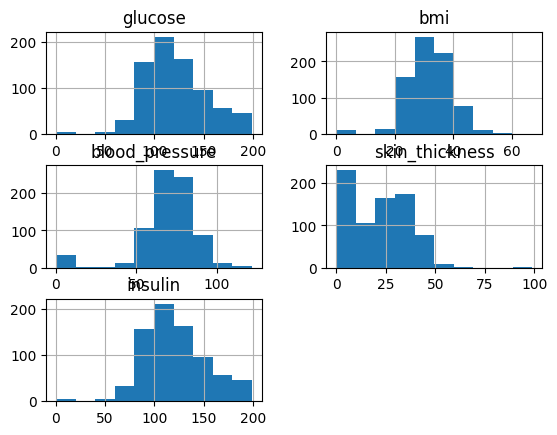

In [8]:
first_data[['glucose','bmi','blood_pressure', 'skin_thickness','insulin']].hist()

При рассмотрении статистических показателей таблицы и гистограммы распределения значений, обращает на себя внимание наличие нулевых значений в показателях 'glucose', 'blood_pressure', 'skin_thickness', 'insulin' и 'bmi', что физиологически невозможно. Так же в стобце  'skin_thickness' можно видеть, что больше половины значений расположены в промежутке от 0 до 10.



Для выяснения количества пропущенных значений, заменим нулевые значения на Nan.

In [9]:
lab_values = ['glucose','bmi','blood_pressure', 'skin_thickness','insulin']
def change_nan(first_df:pd.DataFrame) -> pd.DataFrame:
    """Replace zero-values on np.nan

    Args:
        first_df (pd.DataFrame): DataFrame with zero values, where they can't exist

    Returns:
        pd.DataFrame: DataFrame whith nan-values for further evaluation
    """
    f = first_df.copy()
    for val in lab_values:
        f.loc[f[val] == 0, val] = np.nan
    return f

first_df = change_nan(first_data)


Проверим количество неизвестных значений.

In [10]:
first_df.isnull().value_counts(normalize=True)

pregnancies  glucose  blood_pressure  skin_thickness  insulin  bmi    diabetes_pedigree_function  age    outcome
False        False    False           False           False    False  False                       False  False      0.692708
                                      True            False    False  False                       False  False      0.250000
                      True            True            False    False  False                       False  False      0.033854
                                                               True   False                       False  False      0.009115
             True     False           False           True     False  False                       False  False      0.006510
             False    False           False           False    True   False                       False  False      0.002604
                                      True            False    True   False                       False  False      0.002604
            

Выясним какой процент данных пропущен.

In [11]:
def missing_values_percentage(df:pd.DataFrame) -> pd.Series:
    """Function for counting percentage of unknown values

    Args:
        df (pd.DataFrame): DataFrame with unknown values

    Returns:
        pd.Series: Series with the percentage of missing values
    """
    first_df_copy = df.copy()
    missing = first_df_copy.columns[first_df_copy.isnull().any()].tolist()
    persentage_missing = round(first_df_copy[missing].isnull().sum()\
        .sort_values(ascending= False)/len(first_df_copy) * 100, 2)
    return persentage_missing


display(missing_values_percentage(first_df))



skin_thickness    29.56
blood_pressure     4.56
bmi                1.43
glucose            0.65
insulin            0.65
dtype: float64

Как видно из таблицы, для нашего анализа можно использовать данные глюкозы, инсулина, ИМТ и давления. Так же, так как средние и медианные значения достаточно близкие друг к другу, и количество пропущенных значений менее 13%, заменим пропущенные значения медианным. 
Данные из столбца skin_thickness для анализа неподходят, их учитывать не будем.

In [12]:
first_df = first_df.drop(['skin_thickness'], axis = 1)
lab_values = [x for x in lab_values if x != 'skin_thickness' ]
print(lab_values)

['glucose', 'bmi', 'blood_pressure', 'insulin']


In [13]:
first_df[lab_values] = first_df[lab_values].fillna(first_df[lab_values].median()) # заполним пропущенные значения

first_df.describe()

,pregnancies,glucose,blood_pressure,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,121.656250,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,30.438286,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,44.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,99.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,117.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,140.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,199.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
first_df.isnull().sum() #проверим все ли правильно сработало, остались ли пропущенные значения

pregnancies                   0
glucose                       0
blood_pressure                0
insulin                       0
bmi                           0
diabetes_pedigree_function    0
age                           0
outcome                       0
dtype: int64

## Анализ данных

С помощью библиотеки phik посмотрим корреляцию между Outcome и остальными переменными

interval columns not set, guessing: ['pregnancies', 'glucose', 'blood_pressure', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']


<Axes: >

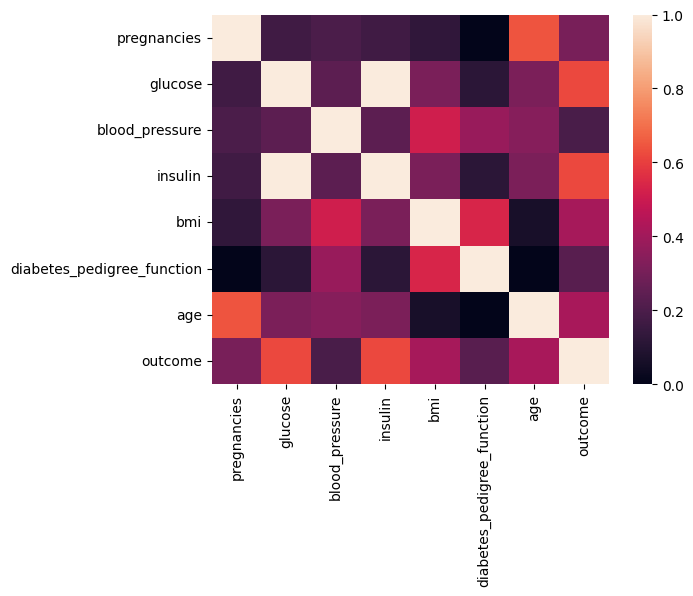

In [15]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = first_df.phik_matrix()
sns.heatmap(phik_overview)


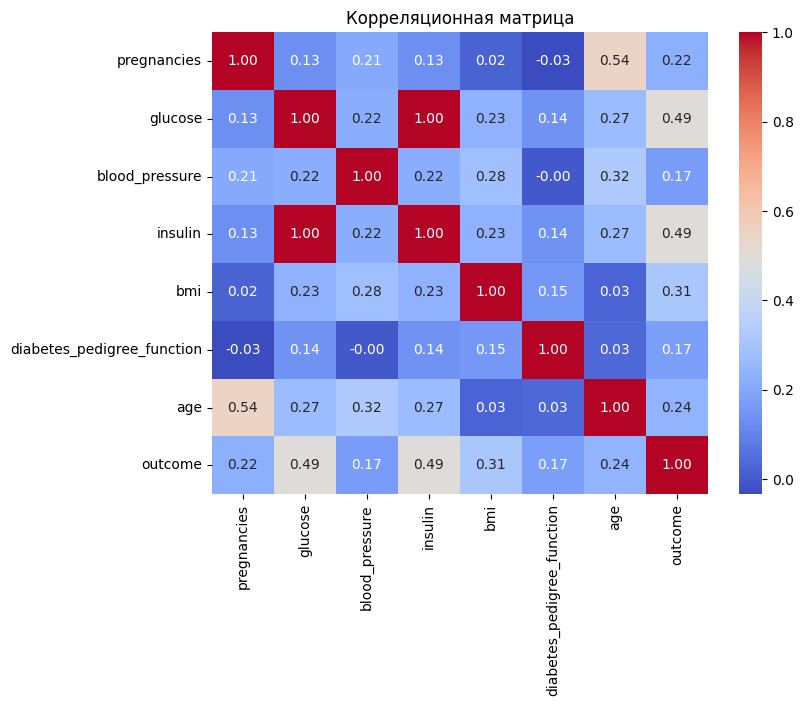

In [16]:
first_df_corr= first_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(first_df_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

При анализе вышеуказанных графиков можно заметить достаточную корреляцию между показателями инсулина, глюкозы и исходом.

Чуть менее выраженная корелляция между индексом bmi и возрастом. И совсем незначительная корелляция с коэфициентом наследования и давлением. Однако существует связь между bmi и диастолическим давлением и коэфициентом наследования.

Из чего можно сделать предположение, что основными факторами риска развития диабета являются высокие уровни глюкозы и инсулина. Что в реальности приводит к состоянию инсулинорезестентности, и в дальнейшем к развитию сахарного диабета.

Подтвердим данные предположения с помощью сводных таблиц.

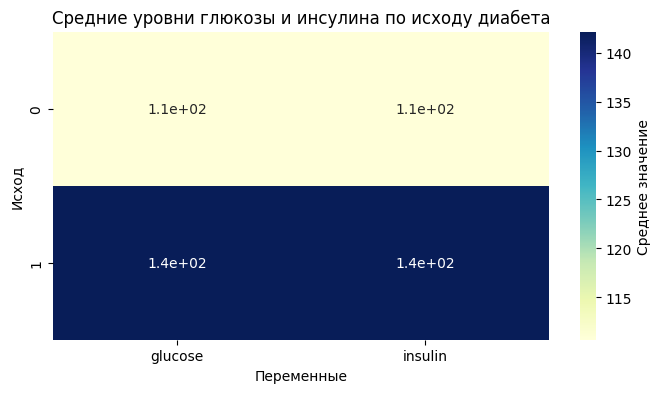

In [17]:
pivot_table_glucose_insulin = first_df.pivot_table(
    values=['glucose', 'insulin'],
    index='outcome',
    aggfunc='mean',
    fill_value=0
)

plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table_glucose_insulin, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Среднее значение'})
plt.title('Средние уровни глюкозы и инсулина по исходу диабета')
plt.xlabel('Переменные')
plt.ylabel('Исход')
plt.show()

Как мы видим из данного графика средние уровни инсулина и глкюкозы у пациентов с сахарным диабетом выше чем, у пациентов без диабета. Следовательно мы можем сделать заключение , что высокие уровни глюкозы и инсулина  равно диабет. Посмотрим как меняются уровни глюкозы  и инсулина в зависимости от возраста, индекса bmi. 

Для более наглядной оценки создадим интервалы по возрасту и индексу bmi.

In [18]:
bins = [18, 30, 45, 60, 100] #для возраста создадим отдельные группы
labels = ['18-30', '31-45', '46-60', '61-100'] # создаем значения категорий
first_df['age_group'] = pd.cut(first_df['age'], 
                               bins=bins, labels=labels, right=False) # создаем новый столбец в таблице
        

In [19]:
first_df['age_group'].value_counts()

age_group
18-30     396
31-45     239
46-60     101
61-100     32
Name: count, dtype: int64

Отметим, что количество наблюдений в диапазоне возраста от 61 - 100 самое маленькое.

In [20]:
bins_bmi = [1, 18.5, 24.9, 29.9, 34.9, 39.9, 100] # создаем границы групп
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'] # создаем названия категорий
first_df['bmi_category'] = pd.cut(first_df['bmi'],
                                  bins=bins_bmi, labels=labels_bmi, right=True) #создаем новый столбец 

In [21]:
first_df['bmi_category'].value_counts()

bmi_category
Obesity I      235
Overweight     179
Obesity II     150
Normal         102
Obesity III     98
Underweight      4
Name: count, dtype: int64

# Возраст, как фактор риска

Создаем сводную таблицу по возрастным группам и наличию диабета, в ячейках средние значения индекса bmi, глюкозы, инсулина.

In [22]:
pivot_table_age = first_df.pivot_table( 
    values=['bmi', 'glucose', 'insulin'],
    index='age_group', columns='outcome', aggfunc='mean', fill_value=0)
pivot_table_age

C:\Users\Kaiya07\AppData\Local\Temp\ipykernel_13204\909567204.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_age = first_df.pivot_table(


bmi                glucose                 insulin  \
outcome            0          1           0           1           0   
age_group                                                             
18-30      30.681090  37.101190  107.628205  140.642857  107.628205   
31-45      31.595041  35.266949  111.760331  140.889831  111.760331   
46-60      31.595455  33.666667  118.545455  144.736842  118.545455   
61-100     28.569565  31.755556  131.391304  155.777778  131.391304   

                       
outcome             1  
age_group              
18-30      140.642857  
31-45      140.889831  
46-60      144.736842  
61-100     155.777778

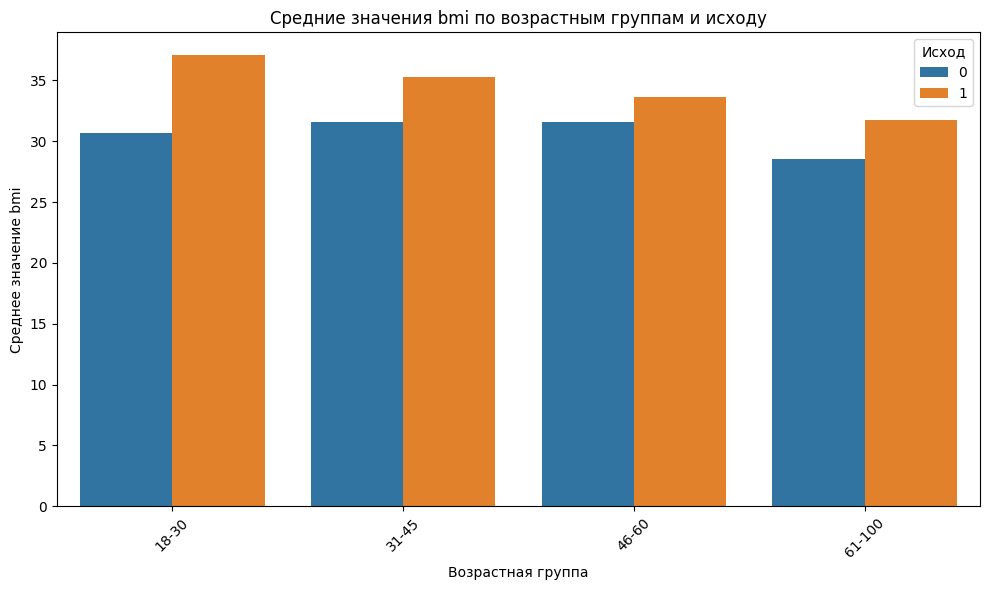

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(
data=pivot_table_age['bmi'].reset_index().melt(id_vars='age_group'),
x='age_group',
y='value',
hue='outcome'
)
plt.title('Средние значения bmi по возрастным группам и исходу')
plt.xlabel('Возрастная группа')
plt.ylabel('Среднее значение bmi')
plt.legend(title='Исход')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

С данного графика можно сделать следующие выводы:
- нет прироста индекса bmi  с возрастом
- в группах, где есть сахарный диабет средние значения индекса bmi выше, чем в группе где нет диабета

Рассмотрим распределение глюкозы и инсулина.

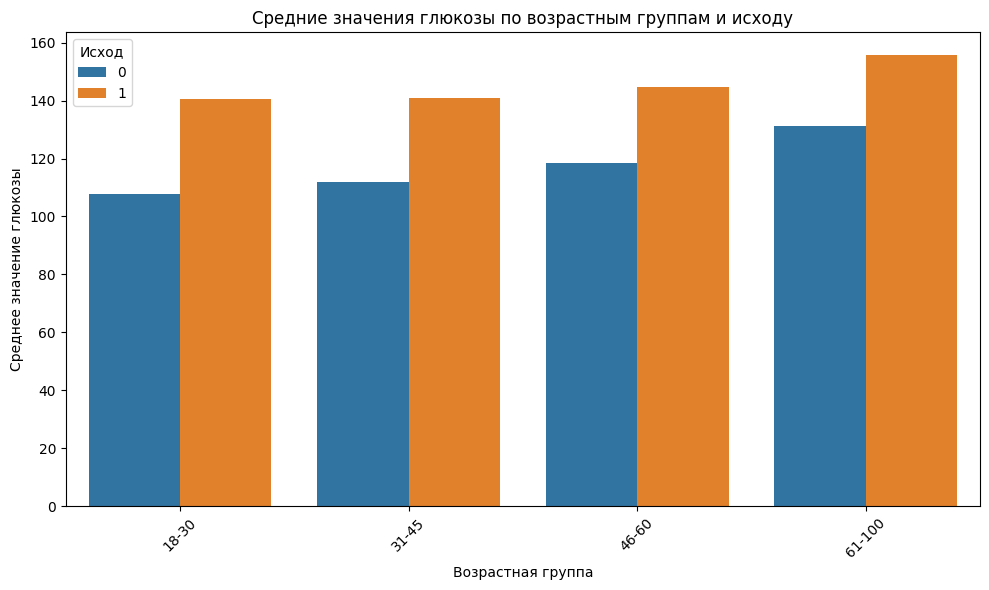

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(
data=pivot_table_age['glucose'].reset_index().melt(id_vars='age_group'),
x='age_group',
y='value',
hue='outcome'
)
plt.title('Средние значения глюкозы по возрастным группам и исходу')
plt.xlabel('Возрастная группа')
plt.ylabel('Среднее значение глюкозы')
plt.legend(title='Исход')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

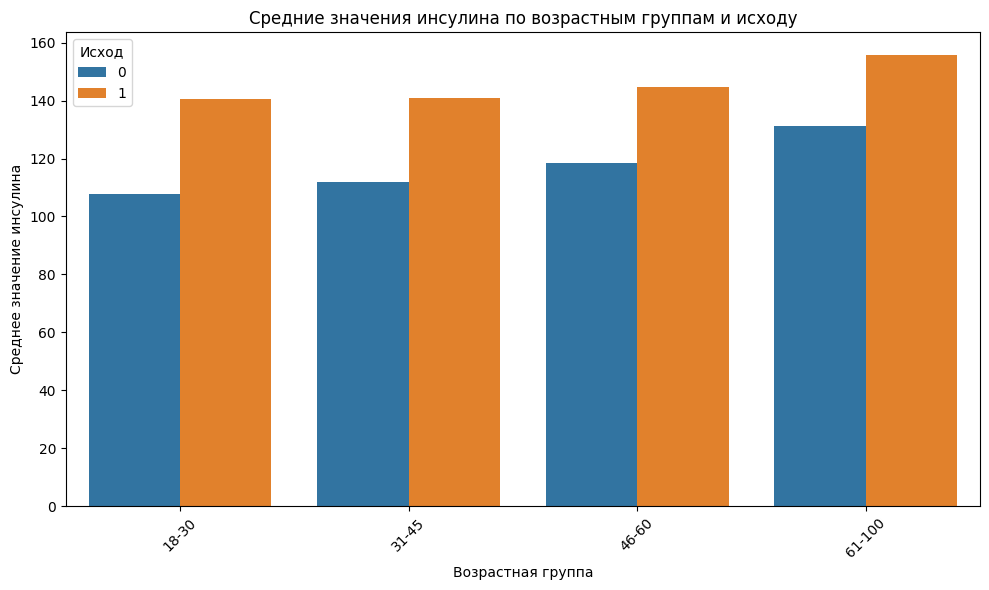

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(
data=pivot_table_age['insulin'].reset_index().melt(id_vars='age_group'),
x='age_group',
y='value',
hue='outcome'
)
plt.title('Средние значения инсулина по возрастным группам и исходу')
plt.xlabel('Возрастная группа')
plt.ylabel('Среднее значение инсулина')
plt.legend(title='Исход')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Для нас не является сюрпризом, что у пациентов с сахарным диабетом уровни глюкозы и инсулина выше, однако отметим, что они растут с возрастом.
Из чего мы можем сделать вывод, что с возрастом нарастает инсулинорезестентность и следовательно риск развития диабета выше.

Создадим сводню таблицу по категориям bmi.

# BMI, как фактор риска

C:\Users\Kaiya07\AppData\Local\Temp\ipykernel_13204\3188248469.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_bmi = first_df.pivot_table(


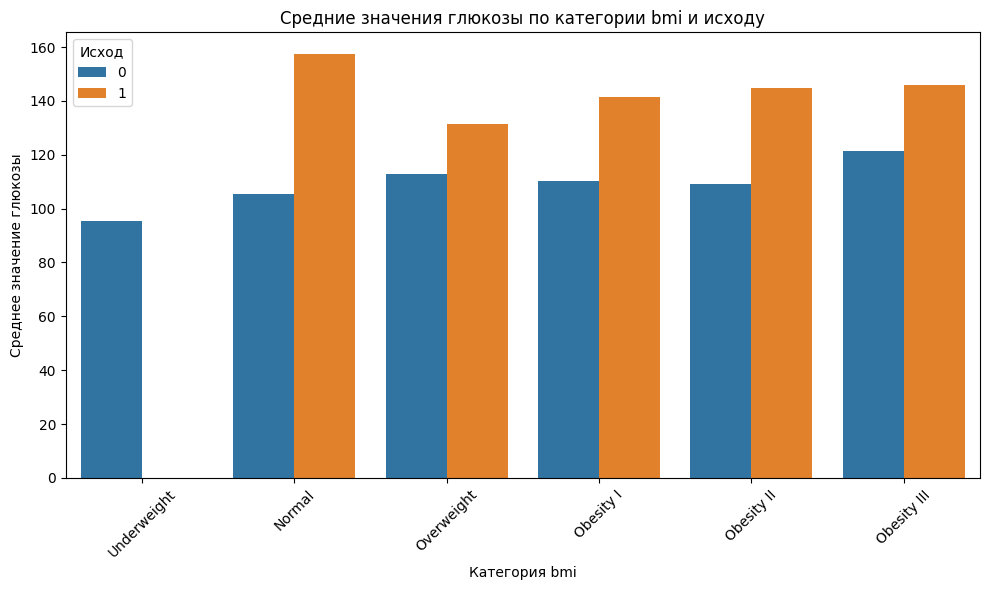

In [26]:
pivot_table_bmi = first_df.pivot_table(
    values=[ 'diabetes_pedigree_function', 'blood_pressure', 'insulin', 'glucose'],
    index='bmi_category', columns='outcome', aggfunc='mean', fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(
data=pivot_table_bmi['glucose'].reset_index().melt(id_vars='bmi_category'),
x='bmi_category',
y='value',
hue='outcome'
)
plt.title('Средние значения глюкозы по категории bmi и исходу')
plt.xlabel('Категория bmi')
plt.ylabel('Среднее значение глюкозы')
plt.legend(title='Исход')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ожидаемо, что уровни глюкозы выше, однако при распределении по категориям bmi, уровни глюкозы у пациентов с нормальным bmi и диагнозом сахарный диабет намного выше чем у пациентов с ожирением. Это не укладывается в современную концепцию о патогенезе сахарного диабета. Рассмотрим данную категорию повнимательнее.

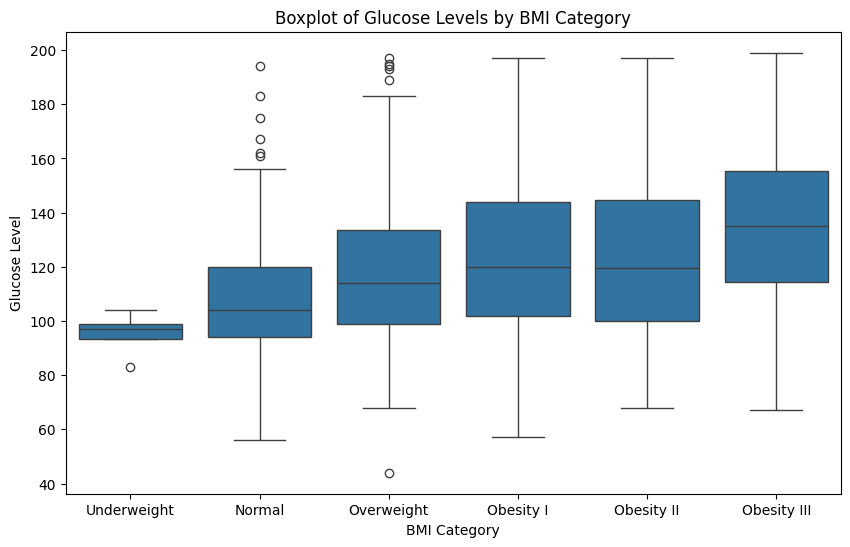

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_category', y='glucose', data=first_df)
plt.title('Boxplot of Glucose Levels by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Glucose Level')
plt.show()

C:\Users\Kaiya07\AppData\Local\Temp\ipykernel_13204\1540114503.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_bm = first_df.pivot_table(


<Figure size 1000x600 with 0 Axes>

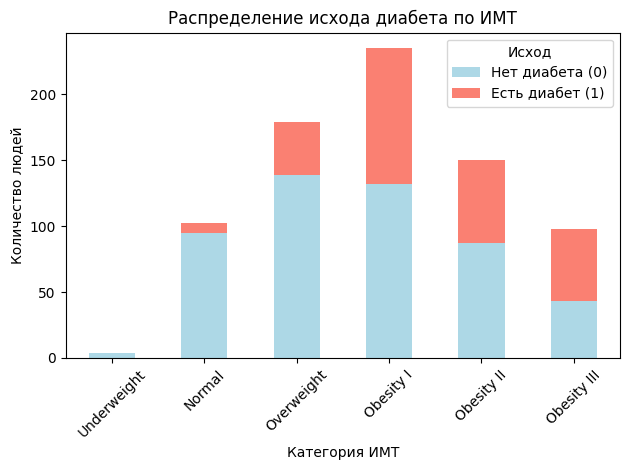

In [28]:
pivot_table_bm = first_df.pivot_table(
    index='bmi_category',
    columns='outcome',
    aggfunc='size',
    fill_value=0
)
plt.figure(figsize=(10, 6))
pivot_table_bm.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Распределение исхода диабета по ИМТ')
plt.xlabel('Категория ИМТ')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.legend(title='Исход', labels=['Нет диабета (0)', 'Есть диабет (1)'])
plt.tight_layout()
plt.show()

Как видно из графика boxplot в группе Normal есть аномальные значения глюкозы, которые и дает такой прирост на столбчатой диаграмме.

Рассмотрим фактор наследования.

# Наследственность, как фактор риска

C:\Users\Kaiya07\AppData\Local\Temp\ipykernel_13204\3197512049.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_bmi = first_df.pivot_table(


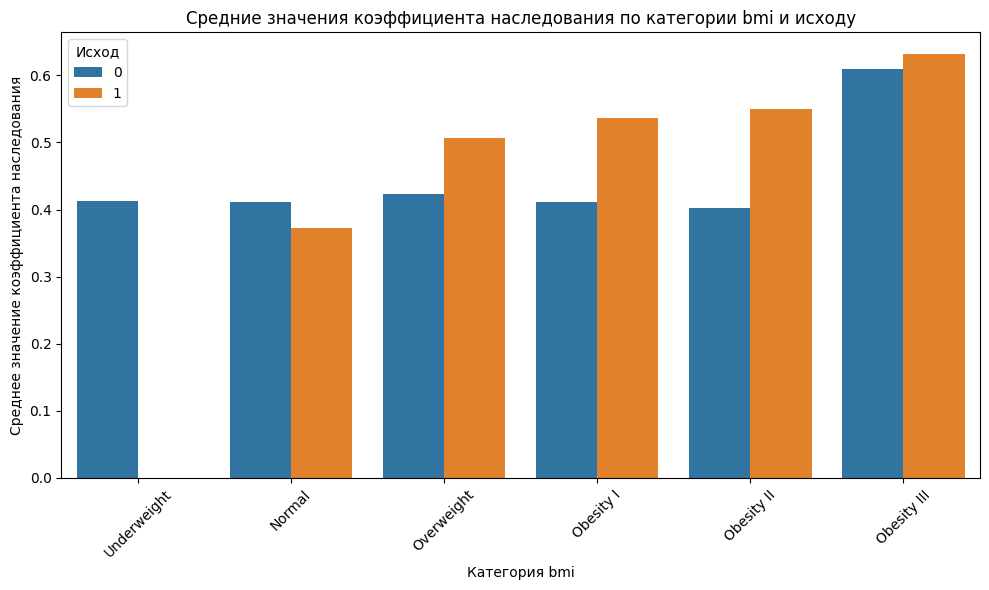

In [29]:
pivot_table_bmi = first_df.pivot_table(
    values=[ 'diabetes_pedigree_function', 'blood_pressure', 'insulin', 'glucose'],
    index='bmi_category', columns='outcome', aggfunc='mean', fill_value=0)

plt.figure(figsize=(10, 6))
sns.barplot(
data=pivot_table_bmi['diabetes_pedigree_function'].reset_index().melt(id_vars='bmi_category'),
x='bmi_category',
y='value',
hue='outcome'
)
plt.title('Средние значения коэффициента наследования по категории bmi и исходу')
plt.xlabel('Категория bmi')
plt.ylabel('Среднее значение коэффициента наследования')
plt.legend(title='Исход')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

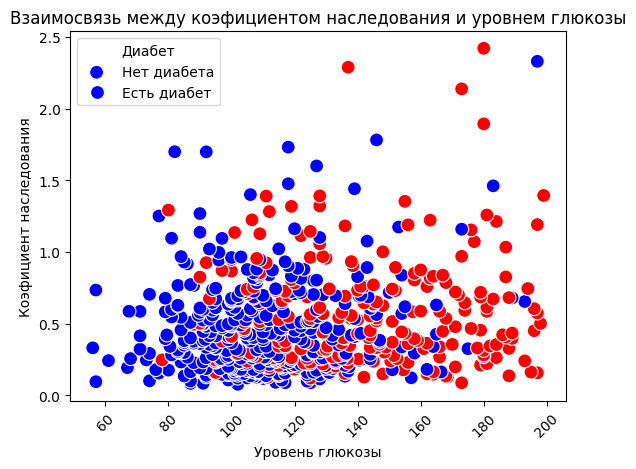

In [30]:
ped_table_ = first_df.groupby(['diabetes_pedigree_function', 'outcome'])['glucose'].mean().reset_index()
sns.scatterplot(x='glucose', y='diabetes_pedigree_function', hue='outcome', data=ped_table_, palette={0: "blue", 1: "red"}, s=100)
plt.title('Взаимосвязь между коэфициентом наследования и уровнем глюкозы')
plt.xlabel('Уровень глюкозы')
plt.ylabel('Коэфициент наследования')
plt.xticks(rotation=45)
plt.legend(title='Диабет', labels=['Нет диабета', 'Есть диабет'])
plt.show()

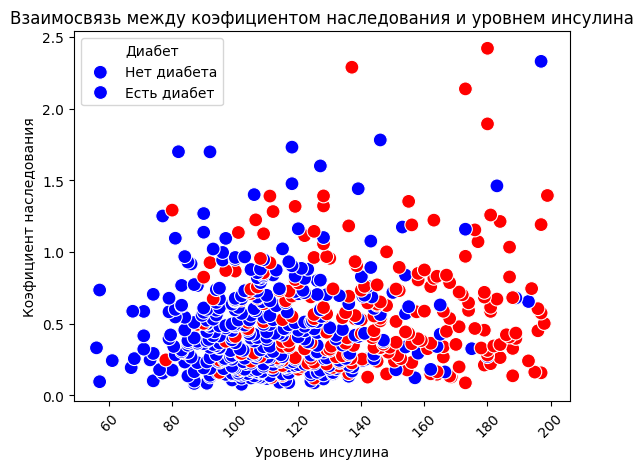

In [31]:
ped_table_ins = first_df.groupby(['diabetes_pedigree_function', 'outcome'])['insulin'].mean().reset_index()
sns.scatterplot(x='insulin', y='diabetes_pedigree_function', hue='outcome', data=ped_table_ins, palette={0: "blue", 1: "red"}, s=100)
plt.title('Взаимосвязь между коэфициентом наследования и уровнем инсулина')
plt.xlabel('Уровень инсулина')
plt.ylabel('Коэфициент наследования')
plt.xticks(rotation=45)
plt.legend(title='Диабет', labels=['Нет диабета', 'Есть диабет'])
plt.show()

Обращает на себя внимание, что при сравнении средних значений коэффициента наследования, у пациентов с ожирением 3 степени данный коэфициент выше чем у остальных категорий, и так же наблюдается прирост данного показателя, из чего можно сделать вывод, что у людей со склонностью к ожирению выше риски развития диабета.
Однако при анализе сводных таблиц коэфициента наследования и показателей глюкозы и инсулина, нельзя назвать генетическую предрасположенность существенным фактором риска, т.к нет существенной кореляции между высоким коэфициентом наследования и уровнями глюкозы и инсулина. 





# Беременность, как фактор риска

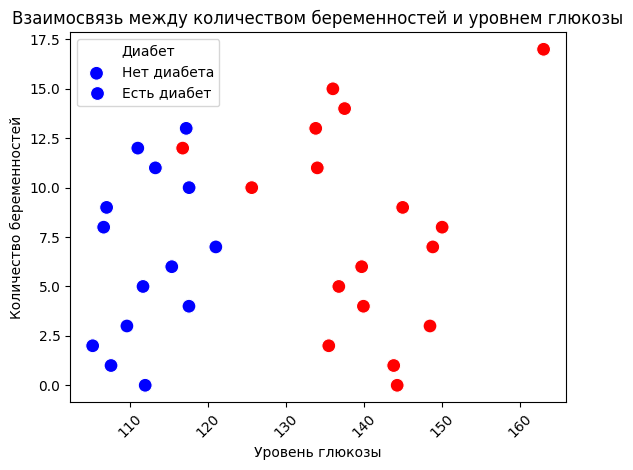

In [32]:
preg_table_gluc = first_df.groupby(['pregnancies', 'outcome'])['glucose'].mean().reset_index()
sns.scatterplot(x='glucose', y='pregnancies', hue='outcome', data=preg_table_gluc, palette={0: "blue", 1: "red"}, s=100)
plt.title('Взаимосвязь между количеством беременностей и уровнем глюкозы')
plt.xlabel('Уровень глюкозы')
plt.ylabel('Количество беременностей')
plt.xticks(rotation=45)
plt.legend(title='Диабет', labels=['Нет диабета', 'Есть диабет'])
plt.show()

### Промежуточные итоги

При анализе первого датасета прослеживается четкая зависимость развития сахарного диабета в зависимости от индекса BMI. Так же отмечается рост уровней глюкозы и инсулина с возрастом. Влияние генетики и количества беременностей незначительно. Предварительно можно сказать, что основными факторами риска является высокий индекс BMI и возраст.

# Второй датасет

In [33]:
second_test = pd.read_csv('data/test.csv', sep = ',')
second_train = pd.read_csv('data/train.csv', sep = ',')

In [34]:
second_train.tail(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3380,3380,56,1.0,F,YES,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,3383,57,3.0,F,NO,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [35]:
second_test.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN
5,3395,41,2.0,F,YES,7.0,0.0,0,0,0,260.0,101.0,68.0,22.49,80.0,77.0
6,3396,59,1.0,M,NO,0.0,0.0,0,0,0,229.0,100.5,66.0,25.18,44.0,81.0
7,3397,41,1.0,F,YES,15.0,0.0,0,0,0,242.0,139.0,80.0,19.68,72.0,60.0
8,3398,39,3.0,M,YES,20.0,0.0,0,0,0,148.0,101.0,62.0,24.47,70.0,81.0
9,3399,38,2.0,F,YES,3.0,0.0,0,0,0,180.0,115.0,86.0,24.91,70.0,NaN


In [36]:
display(second_train.shape)
display(second_test.shape)


(3390, 17)

(848, 16)

## Подготовка данных

In [37]:
second_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [38]:
second_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


На анализ представлено два датасета, причем один из них является продолжением второго. Оба дата сета содержат следущие колонки:
- age - возраст
- education - образование
- sex - пол
- is_smoking - статус курения
- cigsPerDay - количество сигарет за день
- BPMeds - статус приема гипотензивных препаратов
- prevalentStroke - инсульт в анамнезе пациента
- prevalentHyp  - наличие гипертонической болезни
- diabetes - статус по наличию сахарного диабета
- totChol - уровень холестерина
- sysBP - уровень систолического давления
- diaBP - уровень диастолического давления
- BMI - индекс BMI
- heartRate - уровень ЧСС
- glucose - ehjdtym uk.rjps

 Однако они различаются по форме, у таблицы с большим количество данных есть дополнительная колонка TenYearCHD, которая является результатом оценки риска сердечно-сосудистых осложнений в течение 10 лет. Для расчета данного риска требуются данные о поле, возрасте, уровне систолического давления, уровне холестерина и статусе курения.
 Т.о для дальнейшей работы и объединения двух датасетов, следует к таблице test добавить данную колонку.

# Рассчет индекса TenYearCHD

In [39]:
second_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [40]:
value_for_risk = ['sex','age','sysBP', 'totChol', 'is_smoking'] # переменные необходимые для рассчета TenYearCHD
second_test.describe(include= 'all').loc[:, value_for_risk]

,sex,age,sysBP,totChol,is_smoking
count,848,848.000000,848.000000,836.000000,848
unique,2,NaN,NaN,NaN,2
top,F,NaN,NaN,NaN,NO
freq,496,NaN,NaN,NaN,441
mean,NaN,49.755896,131.357901,235.307416,NaN
std,NaN,8.491712,20.975519,41.848200,NaN
min,NaN,33.000000,92.000000,140.000000,NaN
25%,NaN,43.000000,116.000000,205.000000,NaN
50%,NaN,49.000000,127.000000,232.000000,NaN
75%,NaN,56.000000,142.500000,260.000000,NaN


Имена столбцов с нужными  показателями для расчета сердечно-сосудистого риска выделим в отдельный список и посмотрим их статистические параметры. Обращает на себя внимание, что в столбце с показателями холестерина есть пропущенные значения.

In [41]:
second_test['totChol'].isnull().sum()

np.int64(12)

Пропущено всего 12 значений и среднее значение близко к медианному, заполним, пустые значения медианным.

In [42]:
second_test['totChol'] = second_test['totChol'].fillna(
    second_test['totChol'].median())
second_test.describe(include= 'all').loc[:, value_for_risk]

,sex,age,sysBP,totChol,is_smoking
count,848,848.000000,848.000000,848.000000,848
unique,2,NaN,NaN,NaN,2
top,F,NaN,NaN,NaN,NO
freq,496,NaN,NaN,NaN,441
mean,NaN,49.755896,131.357901,235.260613,NaN
std,NaN,8.491712,20.975519,41.552536,NaN
min,NaN,33.000000,92.000000,140.000000,NaN
25%,NaN,43.000000,116.000000,205.750000,NaN
50%,NaN,49.000000,127.000000,232.000000,NaN
75%,NaN,56.000000,142.500000,260.000000,NaN


Напишем фукнцию для рассчета сердечно-сосудистого риска. Несмотря на то, что данная характеристика содержит 4 категории (низкий, умеренный, высокий, очень высокий ). В основной таблице данный столбец придставлен бинарным значением, учитывая это, примем за 0 - риска нет или он низкий, 1 - риск умеренный или высокий.
Предварительно разделим пациентов по возрасту.

In [43]:
def heart_risk(df:pd.DataFrame) -> pd.DataFrame:
    """Function for counting TenYearCHD

    Args:
        df (pd.DataFrame):  Dataframe with with the necessary data

    Returns:
        pd.DataFrame: The same Dataframe with new column TenYearCHD
    """
    conditions = (
        ((df['age'] > 45) & (df['sex'] == 'M')) | 
        ((df['age'] > 55) & (df['sex'] == 'F')) | 
        (df['totChol'] > 240) | 
        (df['sysBP'] > 130) | 
        (df['is_smoking'] == 'yes')
    )
    df['TenYearCHD'] = conditions.astype(int)
    return df

Добавим столбец и соединим таблицы

In [44]:
second_test = heart_risk(second_test)

second_common_data = pd.concat([second_train, second_test], ignore_index=True)
second_common_df = second_common_data.drop_duplicates(ignore_index=True)
second_common_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,1
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,1
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,1
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,1


## Заполнение пропущенных значений, подготовка данных

In [45]:
second_common_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4200 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       4238 non-null   int64  
dtypes: float64(9),

При оценке общей таблицы отметим пустые значения в столбцах : education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose. 

In [46]:
miss_values = ['education', 'cigsPerDay',\
    'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose'] 
display(missing_values_percentage(second_common_df))

glucose       9.16
education     2.48
BPMeds        1.25
totChol       0.90
cigsPerDay    0.68
BMI           0.45
heartRate     0.02
dtype: float64

In [47]:
second_common_df.loc[:, miss_values]

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
0,2.0,3.0,0.0,221.0,NaN,90.0,80.0
1,4.0,0.0,0.0,212.0,29.77,72.0,75.0
2,1.0,10.0,0.0,250.0,20.35,88.0,94.0
3,1.0,20.0,0.0,233.0,28.26,68.0,94.0
4,1.0,30.0,0.0,241.0,26.42,70.0,77.0
...,...,...,...,...,...,...,...
4233,3.0,0.0,0.0,277.0,27.42,63.0,77.0
4234,2.0,0.0,0.0,190.0,23.08,65.0,70.0
4235,1.0,0.0,0.0,199.0,26.41,120.0,NaN
4236,3.0,0.0,0.0,231.0,22.86,75.0,92.0


In [48]:
second_common_df.describe().loc[:, miss_values]

,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose
count,4133.000000,4209.000000,4185.000000,4200.000000,4219.000000,4237.000000,3850.000000
mean,1.978950,9.003089,0.029630,236.708095,25.802008,75.878924,81.966753
std,1.019791,11.920094,0.169584,44.527286,4.080111,12.026596,23.959998
min,1.000000,0.000000,0.000000,107.000000,15.540000,44.000000,40.000000
25%,1.000000,0.000000,0.000000,206.000000,23.070000,68.000000,71.000000
50%,2.000000,0.000000,0.000000,234.000000,25.400000,75.000000,78.000000
75%,3.000000,20.000000,0.000000,263.000000,28.040000,83.000000,87.000000
max,4.000000,70.000000,1.000000,696.000000,56.800000,143.000000,394.000000


In [49]:
display(second_common_df['education'].unique())
display(second_common_df['BPMeds'].unique())

array([ 2.,  4.,  1.,  3., nan])

array([ 0., nan,  1.])

Так как доля пропущенных значений не велика мы можем заполнить ее.
При рассмотрении столбцов с пропущенными значениями, видно что переменные education, BPMeds являются дискретными. Следовательно пропущенные значения в этих столбцах мы заполним модой, а все остальные медианными значениями.

In [50]:
miss_lab_values = [ 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose'] # список с числовыми переменными
miss_cat_values = ['education', 'BPMeds'] # список с дискретными переменными
second_common_df[miss_lab_values] = second_common_df[miss_lab_values].fillna(second_common_df[miss_lab_values].median()) # заполнение значений
second_common_df[miss_cat_values] = second_common_df[miss_cat_values].fillna(second_common_df[miss_cat_values].mode())

In [51]:
second_common_df.describe(include='object').loc[:, ['sex', 'is_smoking']]

,sex,is_smoking
count,4238,4238
unique,2,2
top,F,NO
freq,2419,2144


Так же перед тем как анализировать коррелляцию между признаками, заменим категориальные значения пола и курения на числовые. 
- 0 - женский пол
- 1 - мужской
- 1 - yes
- 0 - no


In [52]:
second_common_df['sex'] = second_common_df['sex'].apply(lambda x:  1 if x == 'M' else 0) # применим lambda функцию 
second_common_df['is_smoking'] = second_common_df['is_smoking'].apply(lambda x:  1 if x == 'YES' else 0)
second_common_df = second_common_df.drop('id', axis = 1) # удалим столбец с индексом, т.к. он не несет полезной информации

## Анализ данных

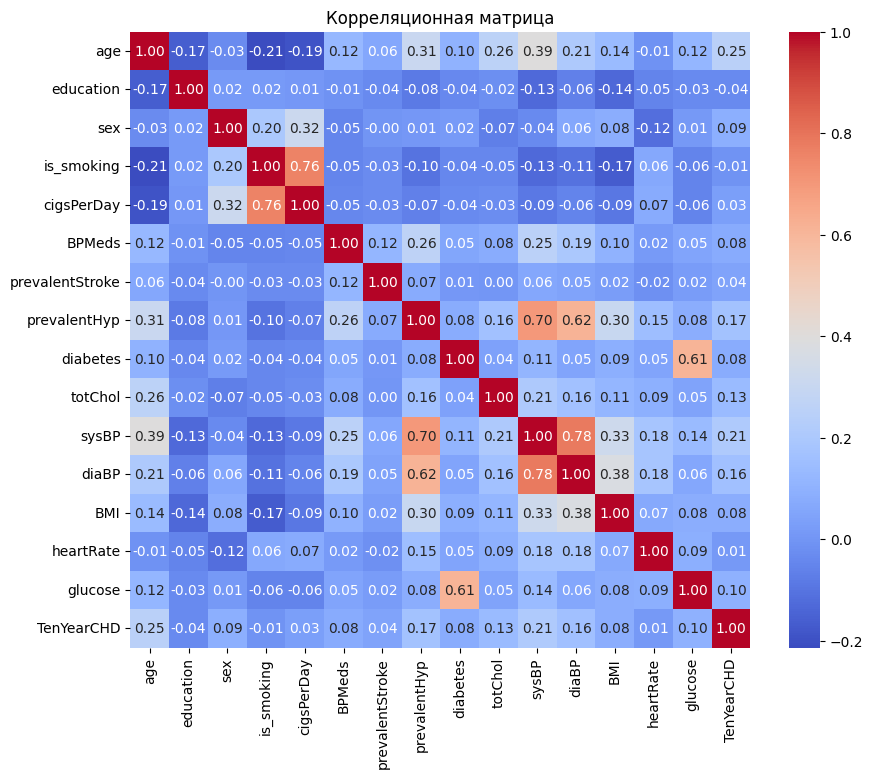

In [53]:
second_df_cor= second_common_df.corr() # создаем корреляционную матрицу
plt.figure(figsize=(10, 8))
sns.heatmap(second_df_cor, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()

При рассмотрении данной корелляционной матрицы, с целью оценки рисков развития диабета, существенная положительная связь есть только между столбцами глюкоза и диабет.
Коэффициент корреляции 0.12 между глюкозой и возрастом говорит о слабой положительной связи. Хотя значение положительное, оно близко к нулю, что означает, что изменение возраста не оказывает значительного влияния на уровень глюкозы, данное утверждение так же верно и для индекса BMI.
Хотя в первом  датасете мы такую связь обнаруживали.




# Пол, как фактор риска

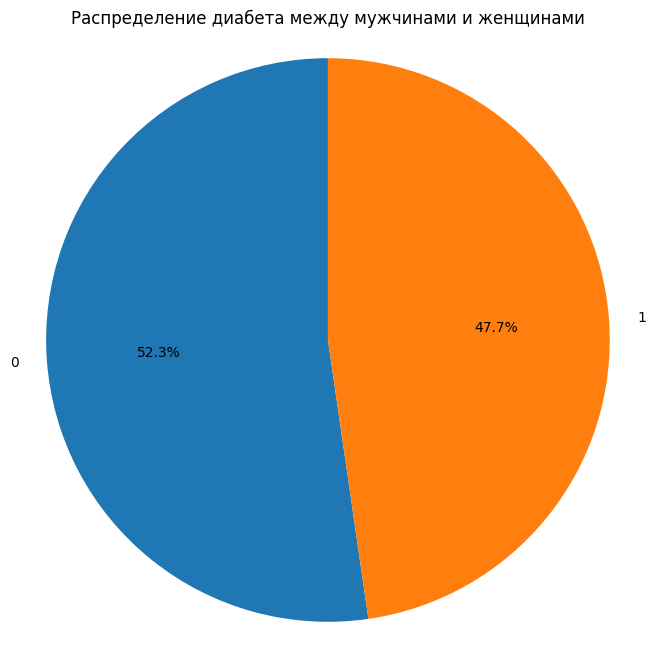

In [54]:
dia_table = second_common_df[second_common_df['diabetes'] == 1]
sex_table = dia_table.groupby('sex')['diabetes'].count().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(sex_table['diabetes'], labels=sex_table['sex'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение диабета между мужчинами и женщинами')
plt.axis('equal')  
plt.show()

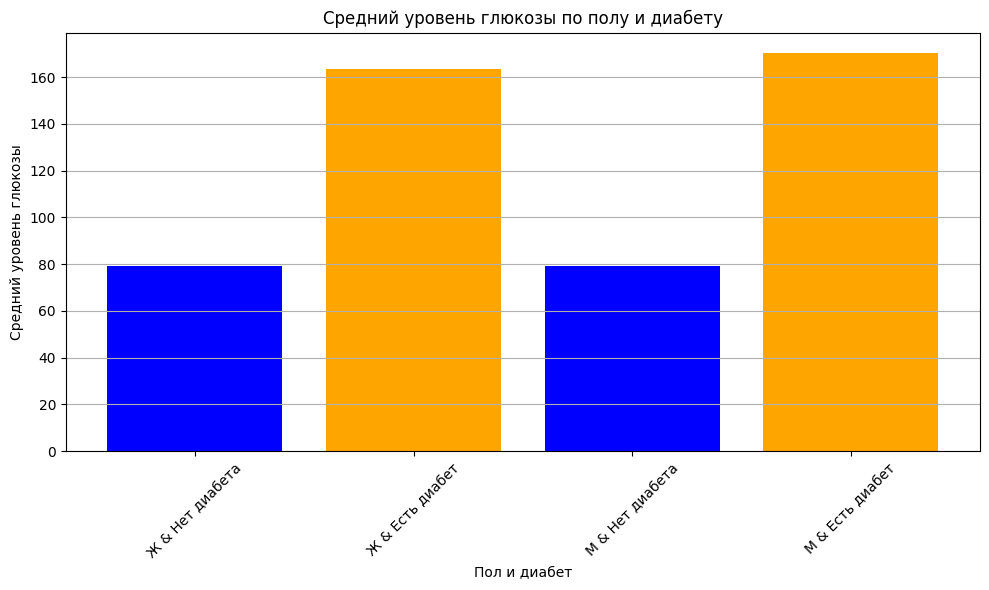

In [55]:
sex_level_gluc = second_common_df.groupby(['sex', 'diabetes'])['glucose'].mean().reset_index()
sex_labels = {0: 'Ж', 1: 'М'}
diabetes_labels = {0: 'Нет диабета', 1: 'Есть диабет'}
# Создаем комбинированные метки для оси X, преобразуя значения в строки
sex_level_gluc['label'] = sex_level_gluc['sex'].map(sex_labels) + ' & ' + sex_level_gluc['diabetes'].map(diabetes_labels)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(sex_level_gluc['label'], sex_level_gluc['glucose'], color=['blue', 'orange'])

plt.title('Средний уровень глюкозы по полу и диабету')
plt.xlabel('Пол и диабет')
plt.ylabel('Средний уровень глюкозы')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

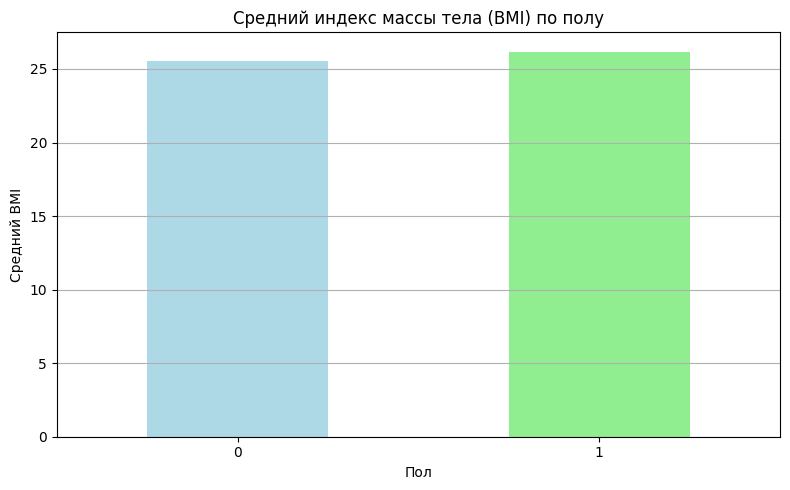

In [56]:
sex_bmi = second_common_df.groupby('sex')['BMI'].mean()
plt.figure(figsize=(8, 5))
sex_bmi.plot(kind='bar', color=['lightblue', 'lightgreen'])

plt.title('Средний индекс массы тела (BMI) по полу')
plt.xlabel('Пол')
plt.ylabel('Средний BMI')
plt.xticks(rotation=0)  # Устанавливаем текст меток по горизонтали для лучшей читаемости
plt.grid(axis='y')  # Добавляем сетку по оси Y для удобства восприятия
plt.tight_layout()  # Автоматически подстраиваем расстояния между элементами
plt.show()

При рассмотрении графика распределения диабета между мужчинами и женщинами, нельзя сказать , что есть существенная разница. При рассмотрении средних значений глюкозы у диабетиков мужчин, мы можем видеть, что значения у них выше. Однако и индекс BMI у них тоже выше.

# Курение, как фактор риска

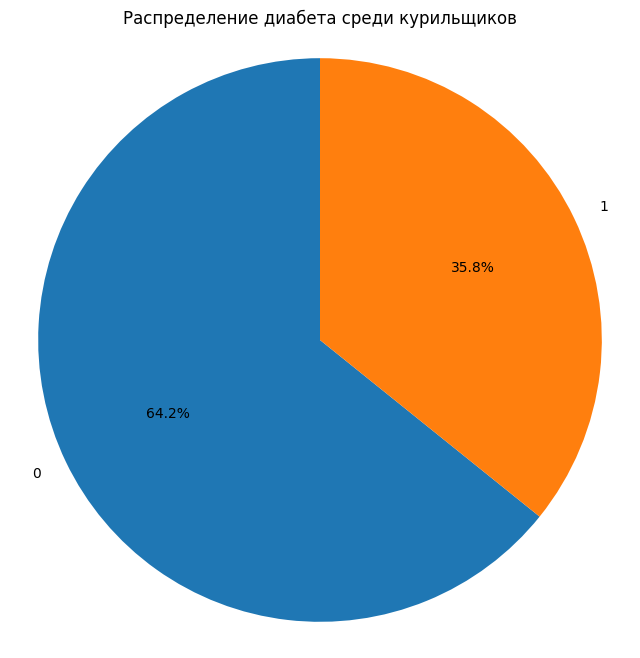

In [57]:
smoke_table = dia_table.groupby('is_smoking')['diabetes'].count().reset_index() # dia_table отфильрованная таблица, где у всех есть диабет
plt.figure(figsize=(8, 8))
plt.pie(smoke_table['diabetes'], labels=smoke_table['is_smoking'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение диабета среди курильщиков')
plt.axis('equal')  
plt.show()

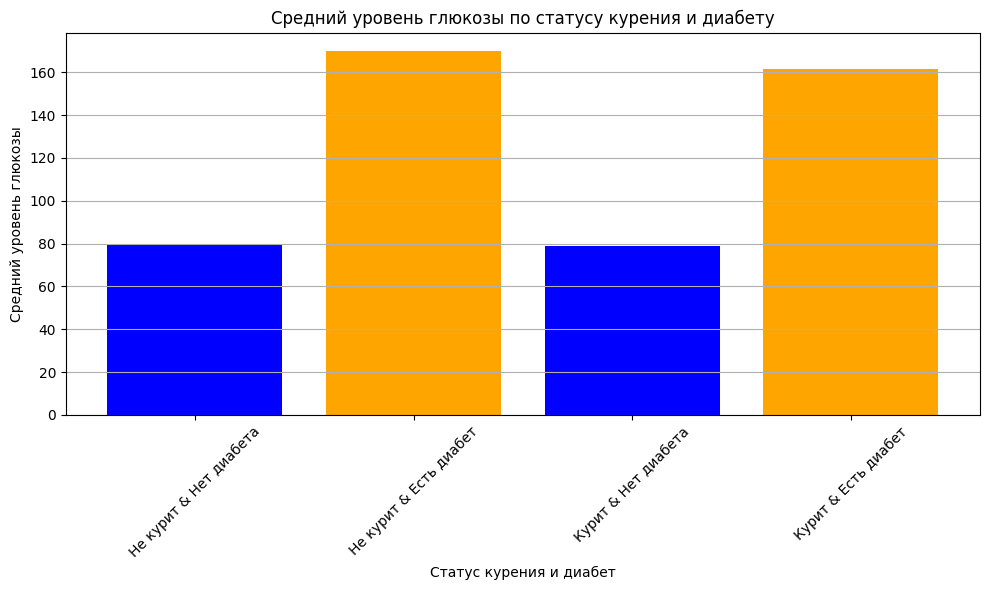

In [58]:
smoke_level_gluc = second_common_df.groupby(['is_smoking', 'diabetes'])['glucose'].mean().reset_index()
smoking_labels = {0: 'Не курит', 1: 'Курит'}
diabetes_labels = {0: 'Нет диабета', 1: 'Есть диабет'}
# Создаем комбинированные метки для оси X, преобразуя значения в строки
smoke_level_gluc['label'] = smoke_level_gluc['is_smoking'].map(smoking_labels) + ' & ' + smoke_level_gluc['diabetes'].map(diabetes_labels)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(smoke_level_gluc['label'], smoke_level_gluc['glucose'], color=['blue', 'orange'])

plt.title('Средний уровень глюкозы по статусу курения и диабету')
plt.xlabel('Статус курения и диабет')
plt.ylabel('Средний уровень глюкозы')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

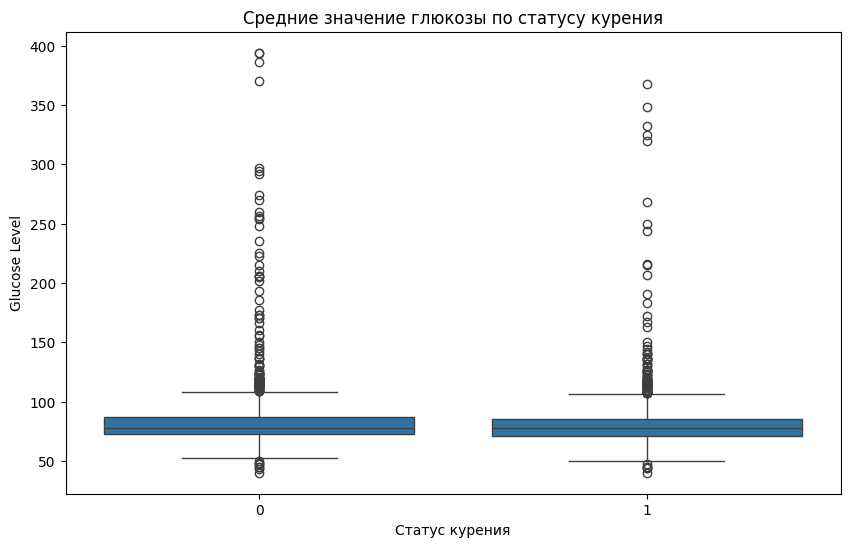

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_smoking', y='glucose', data=second_common_df)
plt.title('Средние значение глюкозы по статусу курения')
plt.xlabel('Статус курения')
plt.ylabel('Glucose Level')
plt.show()

При рассмотрении круговой диаграммы, видно, что среди диабетиков, большая часть не курящие люди.  Так же среди курильщиков нет существенного прироста глюкозы. Курение как фактор риска развития диабета, рассматриваться не может.

# Гипертензия, как фактор риска развития диабета

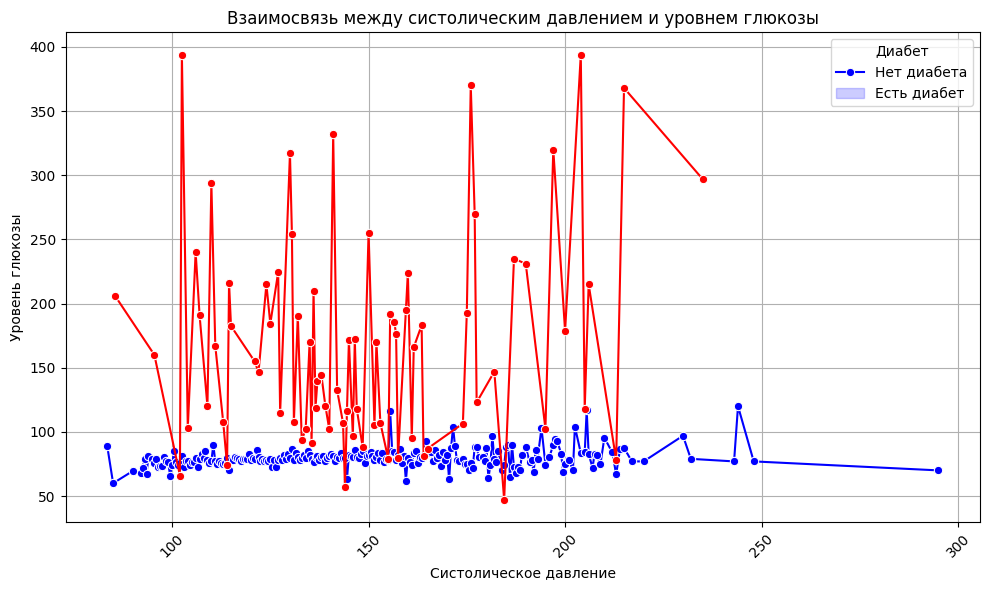

In [60]:
second_table_sysBP = second_common_df.groupby(['sysBP', 'diabetes'])['glucose'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='sysBP', y='glucose', hue='diabetes', data=second_table_sysBP, palette={0: "blue", 1: "red"}, marker='o')

plt.title('Взаимосвязь между систолическим давлением и уровнем глюкозы')
plt.xlabel('Систолическое давление')
plt.ylabel('Уровень глюкозы')
plt.xticks(rotation=45)
plt.legend(title='Диабет', labels=['Нет диабета', 'Есть диабет'])
plt.grid()
plt.tight_layout()
plt.show()



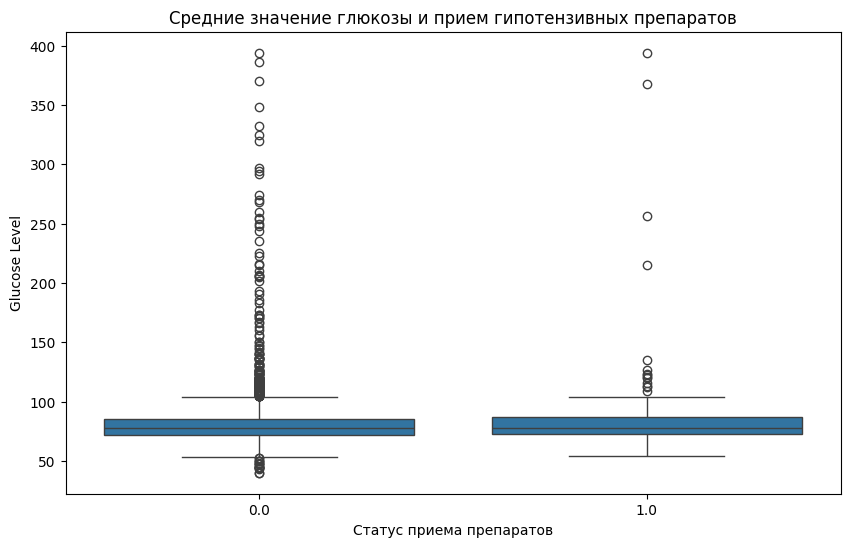

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BPMeds', y='glucose', data=second_common_df)
plt.title('Средние значение глюкозы и прием гипотензивных препаратов')
plt.xlabel('Статус приема препаратов')
plt.ylabel('Glucose Level')
plt.show()

При рассмотрении линейных графиков и  boxplot  нельзя сказать, что есть связь между гипертензией и развитием диабета. Однако отметим, у пациентов , которые принимают гипотензивные препараты, уровень глюкозы чуть выше..

# Объединение датасетов

In [62]:
first_concat_df = pd.concat([second_common_df, first_df], ignore_index=True)
first_concat_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pregnancies',
       'blood_pressure', 'insulin', 'bmi', 'diabetes_pedigree_function',
       'outcome', 'age_group', 'bmi_category'],
      dtype='object')

In [63]:
first_concat_df

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,glucose,TenYearCHD,pregnancies,blood_pressure,insulin,bmi,diabetes_pedigree_function,outcome,age_group,bmi_category
0,64,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,...,80.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,...,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,...,94.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,50,1.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,...,94.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,64,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,...,77.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.0,NaN,10.0,76.0,101.0,32.9,0.171,0.0,61-100,Obesity I
5002,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122.0,NaN,2.0,70.0,122.0,36.8,0.340,0.0,18-30,Obesity II
5003,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,NaN,5.0,72.0,121.0,26.2,0.245,0.0,31-45,Overweight
5004,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.0,NaN,1.0,60.0,126.0,30.1,0.349,1.0,46-60,Obesity I


## Объединение столбцов с одинаковой информацией

In [64]:
def union_columns(col1, col2: pd.Series) -> pd.Series:
    """Function to combine columns with the same information

    Args:
        col1 (pd.Series): Columns with the same information
        col2 (pd.Series): 

    Returns:
        pd.Series:new common column
    """
    col1 = col1.fillna(0)
    col2 = col2.fillna(0)
    return col1 + col2


Объединим столбцы с общей информацией.

In [65]:
first_concat_df['outcome_dia'] = union_columns(first_concat_df['diabetes'], first_concat_df['outcome'])
first_concat_df['dia_pressure'] = union_columns(first_concat_df['blood_pressure'], first_concat_df['diaBP'])
first_concat_df['com_bmi'] = union_columns(first_concat_df['BMI'], first_concat_df['bmi'])
first_concat_df = first_concat_df.drop(['diabetes', 'outcome','blood_pressure','diaBP','BMI','bmi'], axis = 1) # удалим старые столбцы

In [66]:
bins = [18, 30, 45, 60, 100] # дозаполним группы возраста в объединенной таблице
labels = ['18-30', '31-45', '46-60', '61-100']
first_concat_df['age_group'] = pd.cut(first_concat_df['age'], 
                               bins=bins, labels=labels, right=False)

In [67]:

bins_bmi = [1, 18.5, 24.9, 29.9, 34.9, 39.9, 100] # заполним категории bmi в новой таблице
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
first_concat_df['bmi_category'] = pd.cut(first_concat_df['com_bmi'],
                                  bins=bins_bmi, labels=labels_bmi, right=True)

Посмотрим процент пропущенных значений в новой таблице с помощью ранее созданной функции.

In [68]:
display(missing_values_percentage(first_concat_df))

diabetes_pedigree_function    84.66
insulin                       84.66
pregnancies                   84.66
education                     17.44
BPMeds                        16.40
sex                           15.34
prevalentStroke               15.34
cigsPerDay                    15.34
is_smoking                    15.34
prevalentHyp                  15.34
heartRate                     15.34
sysBP                         15.34
totChol                       15.34
TenYearCHD                    15.34
dtype: float64

В указанных столбцах слишком много пропущенных значений, для анализа их испольховать нельзя.

In [69]:
second_table_age = first_concat_df.pivot_table(
    values=['com_bmi', 'glucose'],
    index='age_group', columns='outcome_dia', aggfunc='mean', fill_value=0)

C:\Users\Kaiya07\AppData\Local\Temp\ipykernel_13204\556244772.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  second_table_age = first_concat_df.pivot_table(


Посмотрим как поменялись данные по bmi и возрасту в новой таблице.

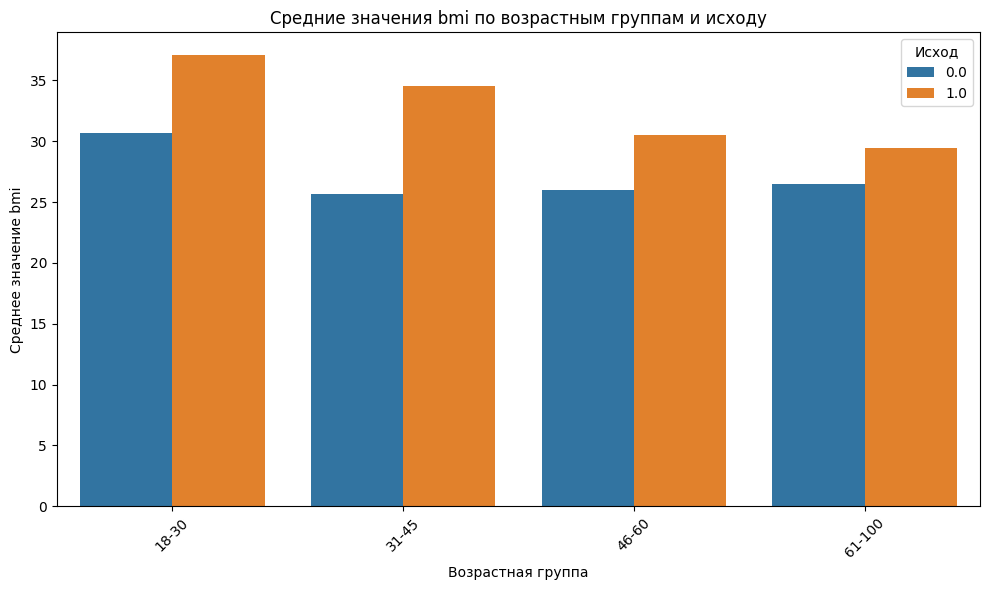

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(
data=second_table_age['com_bmi'].reset_index().melt(id_vars='age_group'),
x='age_group',
y='value',
hue='outcome_dia'
)
plt.title('Средние значения bmi по возрастным группам и исходу')
plt.xlabel('Возрастная группа')
plt.ylabel('Среднее значение bmi')
plt.legend(title='Исход')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

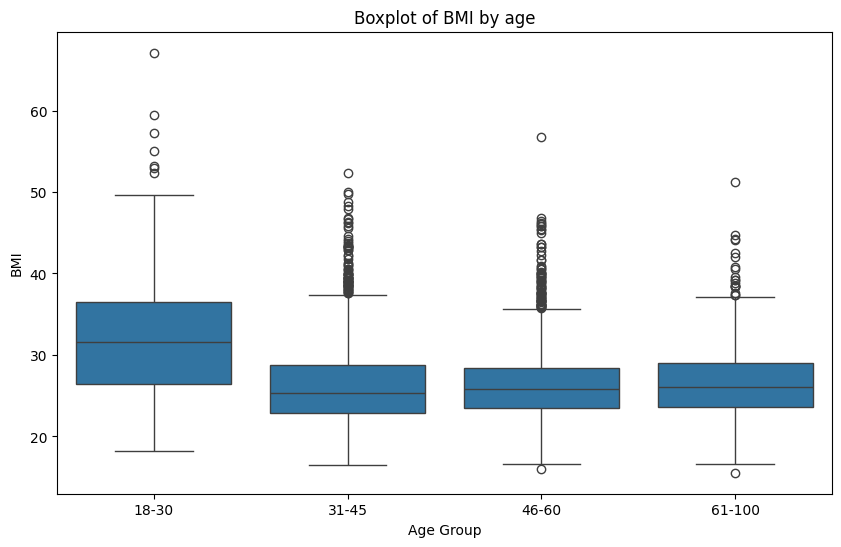

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='com_bmi', data=first_concat_df)
plt.title('Boxplot of BMI by age')
plt.xlabel('Age Group')
plt.ylabel('BMI')
plt.show()

Как и прежде мы наблюдаем, что индекс bmi выше у пациентов с сахарным диабетом. Так же отмечу что индекс bmi   выше в более молодой группе. Это можно объяснить, тем что индекс рассчитывается по росту и весу. С возрастом в процессе дегенерации костной и мышечной систем, пациенты становяться меньше ростом и весом ( за счет саркопении).

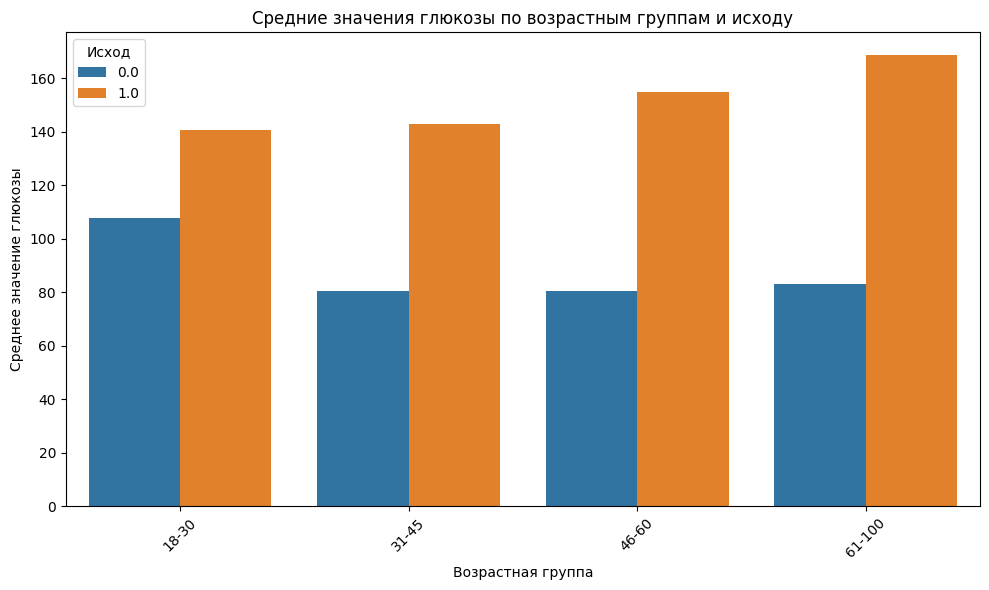

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(
data=second_table_age['glucose'].reset_index().melt(id_vars='age_group'),
x='age_group',
y='value',
hue='outcome_dia'
)
plt.title('Средние значения глюкозы по возрастным группам и исходу')
plt.xlabel('Возрастная группа')
plt.ylabel('Среднее значение глюкозы')
plt.legend(title='Исход')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

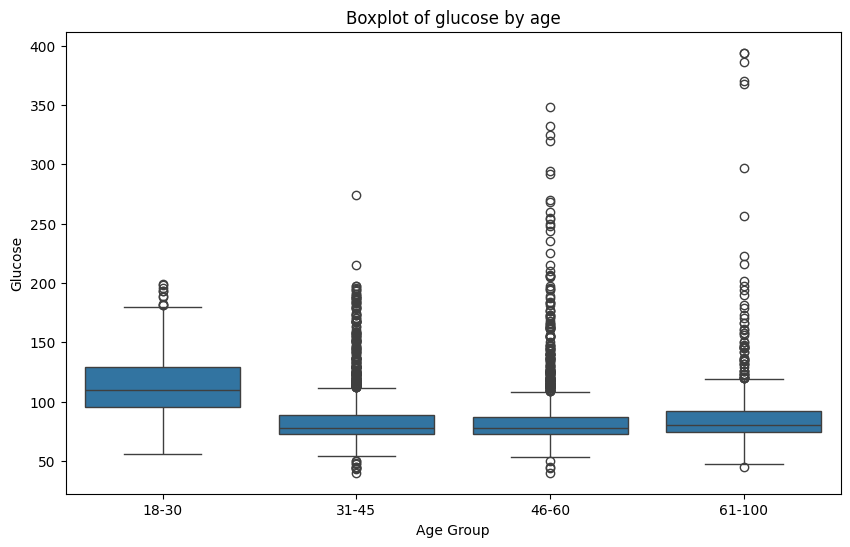

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='glucose', data=first_concat_df)
plt.title('Boxplot of glucose by age')
plt.xlabel('Age Group')
plt.ylabel('Glucose')
plt.show()

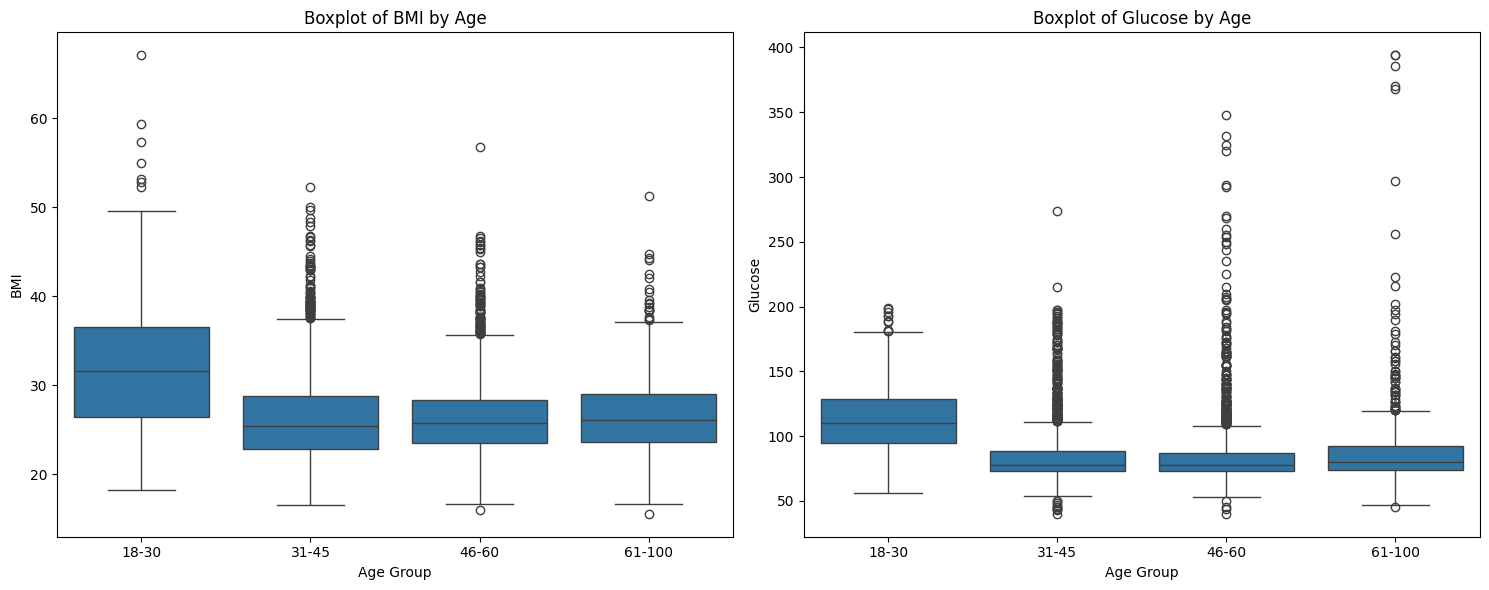

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Первый boxplot для BMI по возрастным группам
sns.boxplot(x='age_group', y='com_bmi', data=first_concat_df, ax=axes[0])
axes[0].set_title('Boxplot of BMI by Age')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('BMI')

# Второй boxplot для уровня глюкозы по возрастным группам
sns.boxplot(x='age_group', y='glucose', data=first_concat_df, ax=axes[1])
axes[1].set_title('Boxplot of Glucose by Age')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Glucose')


plt.tight_layout()  
plt.show()

Предположим, что выбросы на таблице это значения уровня глюкозы у пациентов с сахарным диабетом, как видно из графика, чем старше пациентов, тем выше выбросы средних значений глюкозы. 

# Промежуточные итоги

При анализе датасетов мы выяснили, что пол и курение не могут рассматриваться, как факторы риска развития диабета.
Еще раз увидели взаимосвязь между глюкозой, возрастом, индексом bmi и развитием диабета.

# Третий датасет

In [75]:
third_data_0 = pd.read_csv('data/diabetes_012_health_indicators_BRFSS2015.csv')
third_data_1 = pd.read_csv('data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
third_data_2 = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [76]:
third_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [77]:
third_data_0.rename(columns={'Diabetes_012':'Diabetes_binary'}, inplace=True)
third_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [78]:
third_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [79]:
third_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

На анализ представлены достаточно объемные данные с большим количеством переменных. Учитывая передыдущие анализы, на мой взгляд самые интересные переменные это доход, питание, холестерин, физическая активность и субъективная оценка пациента своего здоровья. И еще раз рассмотрим, пол, гипертензию, bmi  и возраст как факторы риска. Отмечу что в столбце Diabetes_binary появилась новая группа пациентов с преддиабетом.

In [80]:
third_data['diabetes_binary'].value_counts()

NameError: name 'third_data' is not defined

# Подготовка данных

Обращает на себя внимание, что third_data_0 и third_data_2 содержат одинаковое количество строк. Проверим их равенство.

In [1713]:
equal_df = third_data_0.equals(third_data_2)
diff_df = third_data_0.compare(third_data_2)
display(diff_df)

Diabetes_binary      
                  self other
8                  2.0   1.0
10                 2.0   1.0
13                 2.0   1.0
17                 2.0   1.0
23                 2.0   1.0
...                ...   ...
253666             1.0   0.0
253668             2.0   1.0
253670             2.0   1.0
253676             2.0   1.0
253679             2.0   1.0

[39977 rows x 2 columns]

Датасеты не равны, объединим их и удалим дубликаты. Так же приведем названия переменных к нижнему регистру.

In [1714]:
third_data = pd.concat([third_data_0, third_data_1, third_data_2 ], ignore_index=True)
third_data = third_data.drop_duplicates(ignore_index=True)
third_data = third_data.rename(columns=lambda name: name.lower())
third_data

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269126,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,10.0,0.0,0.0,11.0,3.0,1.0
269127,0.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,0.0,4.0,5.0,4.0
269128,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,9.0,6.0,7.0
269129,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0


## Пол

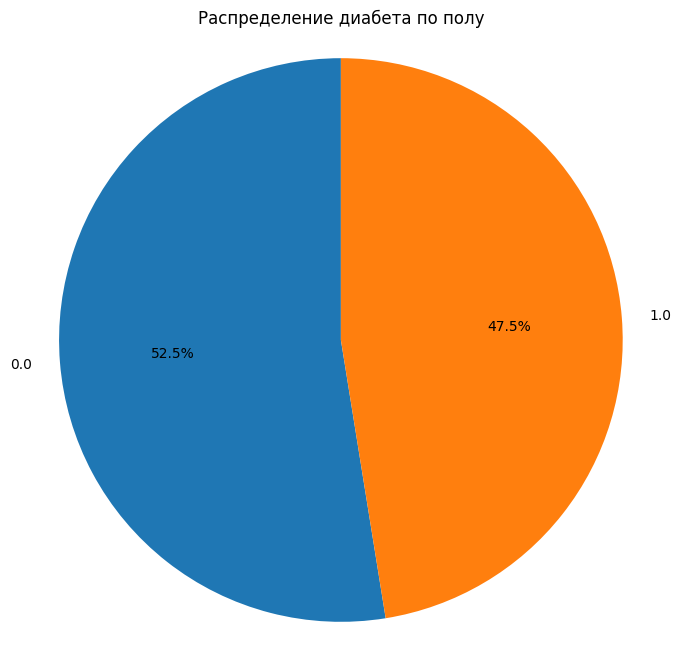

In [1726]:
dia_table_3 = third_data[(third_data['diabetes_binary'] == 1) | (third_data['diabetes_binary'] == 2)]
sex_table_3 = dia_table_3.groupby('sex')['diabetes_binary'].count().reset_index()

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(sex_table_3['diabetes_binary'], labels=sex_table_3['sex'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение диабета по полу')
plt.axis('equal')  
plt.show()

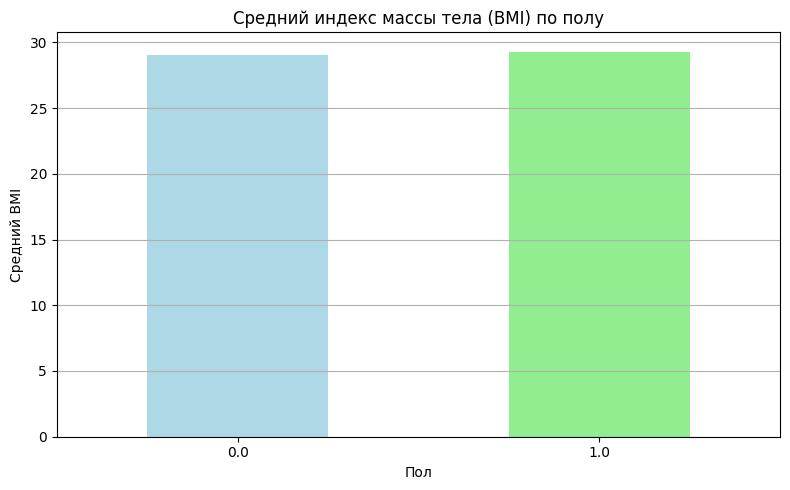

In [1717]:
sex_bmi_3 = third_data.groupby('sex')['bmi'].mean()
plt.figure(figsize=(8, 5))
sex_bmi_3.plot(kind='bar', color=['lightblue', 'lightgreen'])

plt.title('Средний индекс массы тела (BMI) по полу')
plt.xlabel('Пол')
plt.ylabel('Средний BMI')
plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()

Как и в предыдущем датасете, существенной корелляции с полом нет.

## Индекс BMI

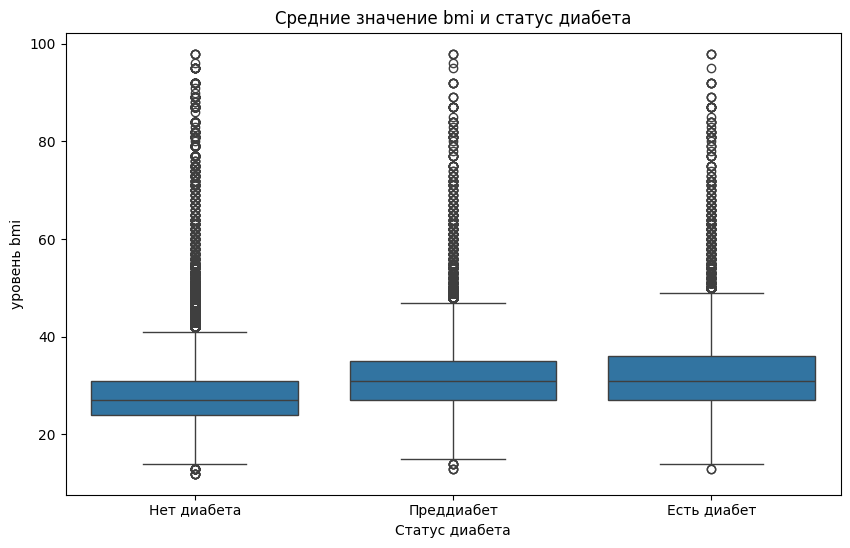

In [1719]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes_binary', y='bmi', data=third_data)
plt.title('Средние значение bmi и статус диабета')
plt.xlabel('Статус диабета')
plt.ylabel('уровень bmi')
plt.xticks(ticks=[0, 1, 2], labels=['Нет диабета', 'Преддиабет', 'Есть диабет'])
plt.show()

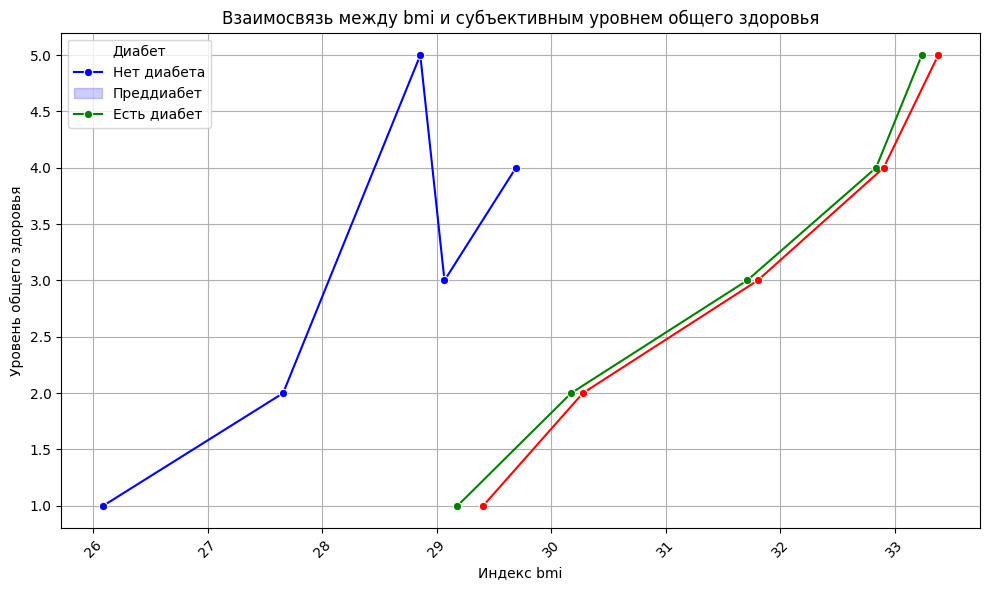

In [1720]:
th_table_bmi_gh = third_data.groupby(['genhlth', 'diabetes_binary'])['bmi'].mean().reset_index()
palette = {0: "blue", 1: "green", 2: "red"}  
hue_order = [0, 1, 2]  

plt.figure(figsize=(10, 6))
sns.lineplot(x='bmi', y='genhlth', hue='diabetes_binary', data=th_table_bmi_gh, palette=palette, hue_order=hue_order, marker='o')

plt.title('Взаимосвязь между bmi и субъективным уровнем общего здоровья')
plt.xlabel('Индекс bmi')
plt.ylabel('Уровень общего здоровья')
plt.xticks(rotation=45)
plt.legend(title='Диабет', labels=['Нет диабета', 'Преддиабет', 'Есть диабет'])
plt.grid()
plt.tight_layout()
plt.show()


Опять отмети , что индекс bmi у пациентов с сахарным диабетом выше, чем у пациентов без диабета, так же отметим, что чем выше индекс bmi, тем хуже субъективно чувствуют себя пациенты.

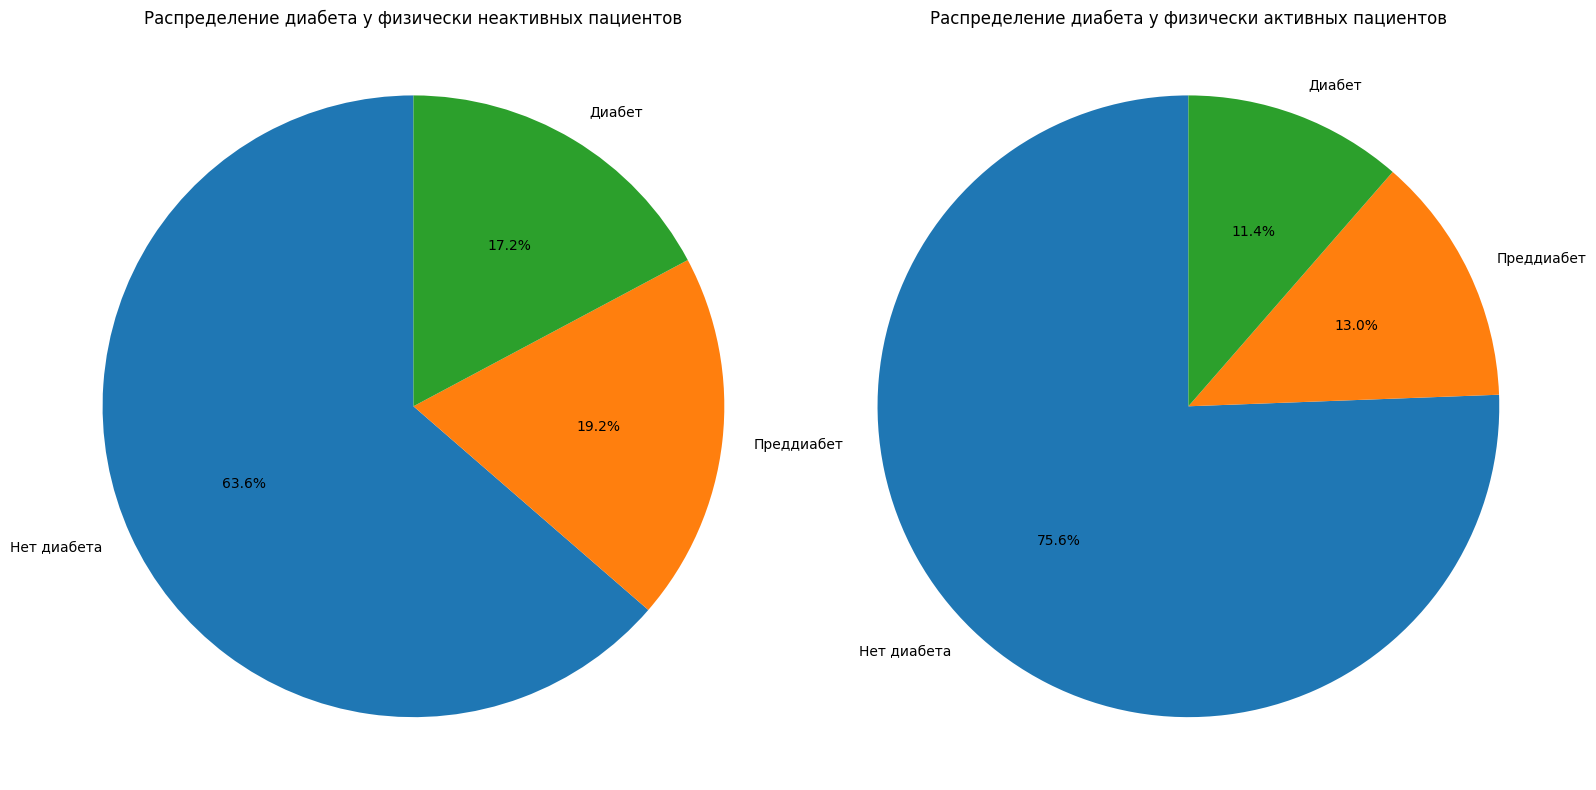

In [1736]:
ph_table_0 = third_data[third_data['physactivity'] == 0]
ph_dia_table_0 = ph_table_0.groupby('diabetes_binary')['physactivity'].count().reset_index()

# Фильтруем данные для физически активных пациентов
ph_table_1 = third_data[third_data['physactivity'] == 1]
ph_dia_table_1 = ph_table_1.groupby('diabetes_binary')['physactivity'].count().reset_index()

# Создаем подграфики
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Круговая диаграмма для физически неактивных пациентов
labels = ['Нет диабета', 'Преддиабет', 'Диабет']
axs[0].pie(ph_dia_table_0['physactivity'], labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Распределение диабета у физически неактивных пациентов')
axs[0].axis('equal')  # Чтобы круговая диаграмма была кругом

# Круговая диаграмма для физически активных пациентов
axs[1].pie(ph_dia_table_1['physactivity'], labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Распределение диабета у физически активных пациентов')
axs[1].axis('equal')  # Чтобы круговая диаграмма была кругом

# Показываем графики
plt.tight_layout()  # Для лучшего размещения подграфиков
plt.show()

Обратим внимание, что процент пациентов без диабета среди физически активных пациентов выше.

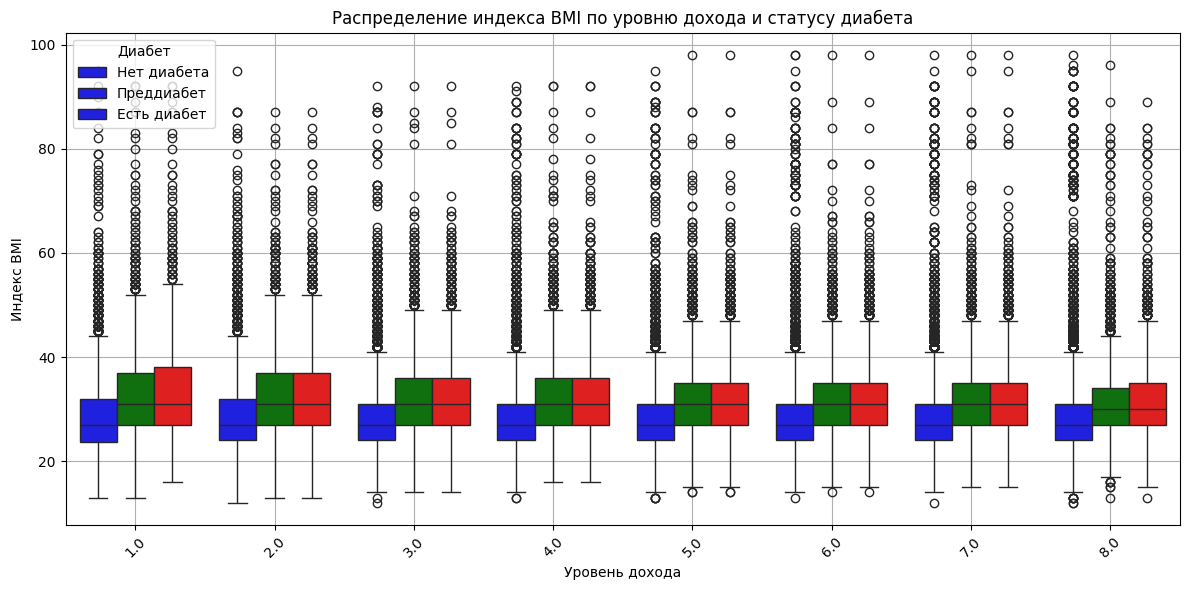

In [1723]:
plt.figure(figsize=(12, 6))

# Создаем boxplot для отображения распределения BMI по уровню дохода и статусу диабета
sns.boxplot(data=third_data, x='income', y='bmi', hue='diabetes_binary', 
             palette=palette, hue_order=hue_order, dodge=True)
palette = {0: "blue", 1: "green", 2: "red"}  
hue_order = [0, 1, 2] 

plt.title('Распределение индекса BMI по уровню дохода и статусу диабета')
plt.xlabel('Уровень дохода')
plt.ylabel('Индекс BMI')
plt.xticks(rotation=45)


plt.legend(title='Диабет', labels=['Нет диабета', 'Преддиабет', 'Есть диабет'])
plt.grid()
plt.tight_layout()
plt.show()

При анализе дохода, следует отметить , что среди пациентов с высоким доходом (7-8) чуть меньше индекс bmi. Больше bmi у пациентов с низким доходом, разница конечно едва заметна, но можно сказать, что социально-экономический фактор, тоже имеет значение

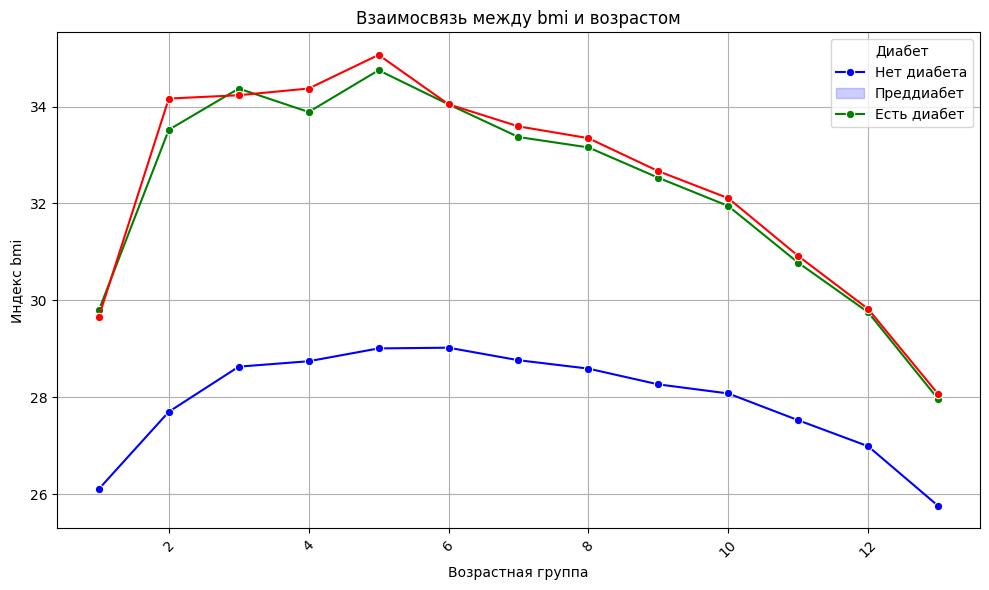

In [1727]:
th_table_bmi_age = third_data.groupby(['age', 'diabetes_binary'])['bmi'].mean().reset_index()
palette = {0: "blue", 1: "green", 2: "red"}  
hue_order = [0, 1, 2]  

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='bmi', hue='diabetes_binary', data=th_table_bmi_age, palette=palette, hue_order=hue_order, marker='o')

plt.title('Взаимосвязь между bmi и возрастом')
plt.xlabel('Возрастная группа')
plt.ylabel('Индекс bmi')
plt.xticks(rotation=45)
plt.legend(title='Диабет', labels=['Нет диабета', 'Преддиабет', 'Есть диабет'])
plt.grid()
plt.tight_layout()
plt.show()

Как и в предыдущих датасетах, мы видим, что индекс bmi снижается с возрастом у обоих категорий пациентов, за счет саркопении. И все равно обратим внимания, что у диабетиков он выше.

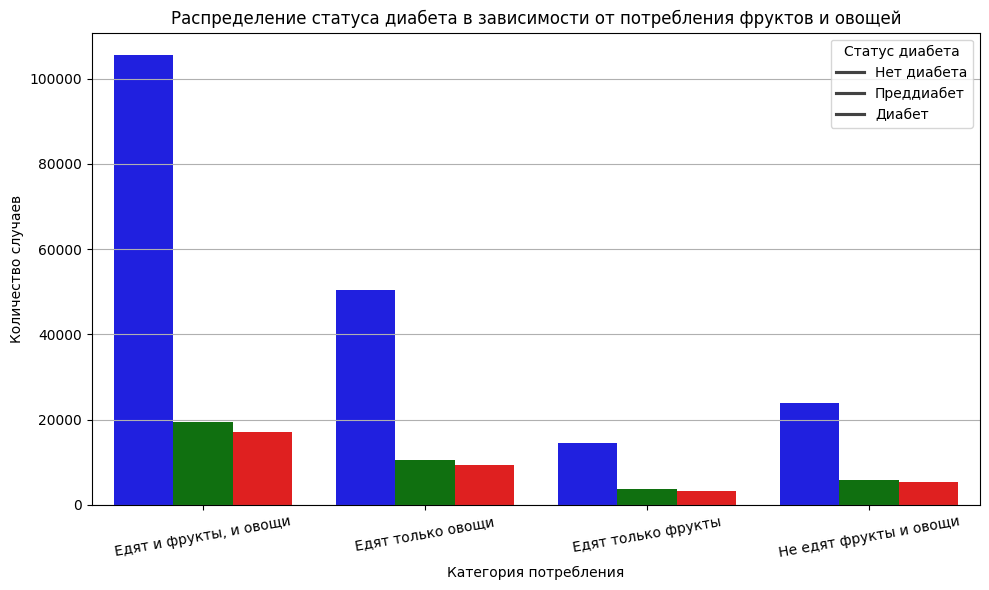

In [ ]:


def categorize_diet(row:pd.Series)-> pd.Series:
    """Function for definition of diet_category

    Args:
        row (pd.Series): Data about nutrition

    Returns:
        pd.Series: new colomn with diet_category
    """
    if row['fruits'] == 1 and row['veggies'] == 1:
        return 'Едят и фрукты, и овощи'
    elif row['fruits'] == 1:
        return 'Едят только фрукты'
    elif row['veggies'] == 1:
        return 'Едят только овощи'
    else:
        return 'Не едят фрукты и овощи'

third_data['diet_category'] = third_data.apply(categorize_diet, axis=1)

# Создаем сводную таблицу для подсчета количества случаев по статусу диабета в зависимости от категории потребления
summary = third_data.groupby(['diet_category', 'diabetes_binary']).size().reset_index(name='count')


plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='diet_category', y='count', hue='diabetes_binary', palette={0: "blue", 1: "green", 2: "red"})


plt.title('Распределение статуса диабета в зависимости от потребления фруктов и овощей')
plt.xlabel('Категория потребления')
plt.ylabel('Количество случаев')
plt.xticks(rotation=10)
plt.legend(title='Статус диабета', labels=['Нет диабета', 'Преддиабет', 'Диабет'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

График красноречиво показывает, что среди диабетиков овощи и фрукты не популярны. Можно сказать особенности диеты сильно вляют на развитие диабета.

## Объединение всех датасетов

In [1594]:
first_concat_df['sysBP'] = first_concat_df['sysBP'].apply(lambda x: 1 if x >= 140 else 0) # приведем столбцы давления и холестерина к бинарному типу
first_concat_df['totChol'] = first_concat_df['totChol'].apply(lambda x: 1 if x >= 130 else 0)

In [ ]:
bins = [18,25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 100] #для возраста создадим  группы, которые определены в third_data
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
first_concat_df['age_group'] = pd.cut(first_concat_df['age'], 
                               bins=bins, labels=labels, right=False)

In [1596]:
first_concat_df = first_concat_df. drop('age', axis = 1) # Удалим числовой датасет

In [1598]:
# Для корректного объединения переименуем столбцы с одинаковой информацией
first_concat_df.rename(columns={'is_smoking':'smoker', 'prevalentStroke':'stroke', 'sysBP':'highbp',
                                'age_group':'age', 'outcome_dia':'diabetes_binary', 'totChol':'highchol','com_bmi':'bmi'}, inplace=True)

In [1599]:
second_concat_df = pd.concat([first_concat_df, third_data], ignore_index=True) # объединяем датасеты

In [1603]:
second_concat_copy = second_concat_df.copy() # переопределим категории bmi
bins_bmi = [1, 18.5, 24.9, 29.9, 34.9, 39.9, 100]
labels_bmi = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']
second_concat_copy['bmi_category'] = pd.cut(second_concat_copy['bmi'],
                                  bins=bins_bmi, labels=labels_bmi, right=True)

In [1604]:
display(missing_values_percentage(second_concat_copy)) # посмотрим процент пропущенной информации

pregnancies                   99.72
insulin                       99.72
diabetes_pedigree_function    99.72
prevalentHyp                  98.45
TenYearCHD                    98.45
cigsPerDay                    98.45
heartRate                     98.45
dia_pressure                  98.17
glucose                       98.17
cholcheck                      1.83
hvyalcoholconsump              1.83
anyhealthcare                  1.83
nodocbccost                    1.83
genhlth                        1.83
heartdiseaseorattack           1.83
physactivity                   1.83
fruits                         1.83
veggies                        1.83
menthlth                       1.83
physhlth                       1.83
diffwalk                       1.83
income                         1.83
education                      0.32
smoker                         0.28
sex                            0.28
stroke                         0.28
dtype: float64

# Гипертония, как фактор риска

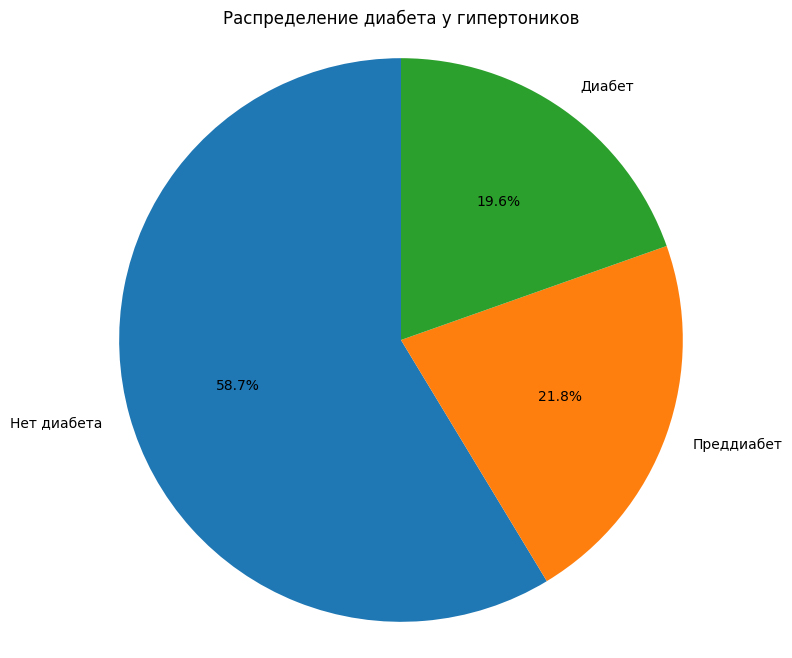

In [ ]:
bp_table = second_concat_copy[second_concat_copy['highbp'] == 1]
diabet_table = bp_table.groupby('diabetes_binary')['highbp'].count().reset_index()
plt.figure(figsize=(8, 8))
labels = ['Нет диабета', 'Преддиабет', 'Диабет']
plt.pie(diabet_table['highbp'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Распределение диабета у гипертоников')
plt.axis('equal')  
plt.show()

Как видно из графика, среди гипертоников не превалирует сахарный диабет. Считаем, что высокое давление не является фактором риска. 

                   Нет диабета  Преддиабет  Диабет
Возрастная группа                                 
1.0                       5621         130      78
2.0                       7048         247     140
3.0                       9783         428     314
4.0                      12171         804     625
5.0                      13885        1262    1049
6.0                      16333        2093    1741
7.0                      20742        3536    3072
8.0                      23650        4817    4241
9.0                      24505        6393    5681
10.0                     22774        7173    6483
11.0                     16906        5685    5090
12.0                     11996        3820    3383
13.0                     13592        3646    3200


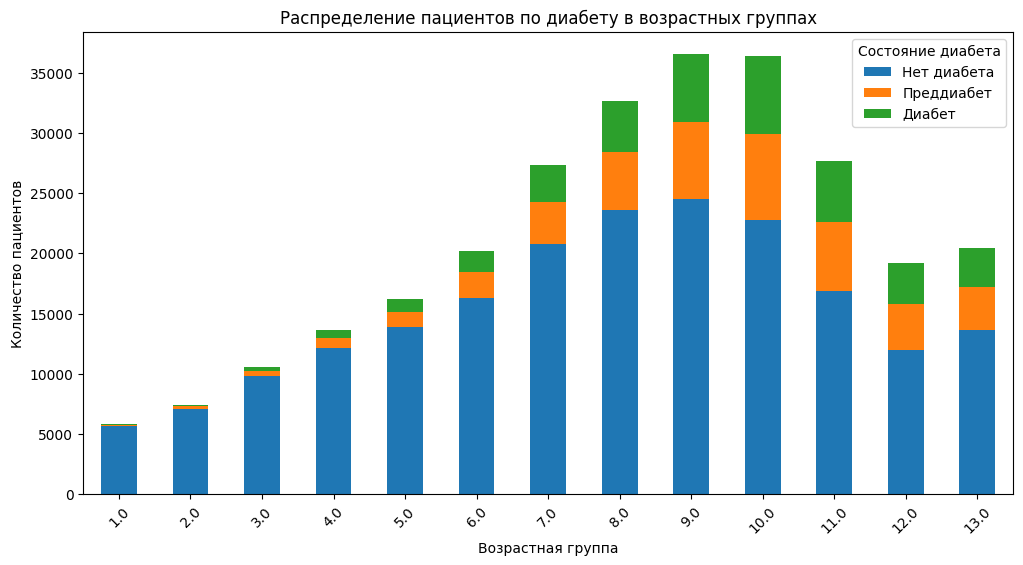

In [1625]:
diabetes_distribution = second_concat_copy.groupby(['age', 'diabetes_binary']).size().unstack(fill_value=0)


diabetes_distribution.index.name = 'Возрастная группа'
diabetes_distribution.columns = ['Нет диабета', 'Преддиабет', 'Диабет']




diabetes_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Распределение пациентов по диабету в возрастных группах')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=45)
plt.legend(title='Состояние диабета')
plt.show()

Как видно из данного графика, риск развития диабета увеличивается с возрастом.

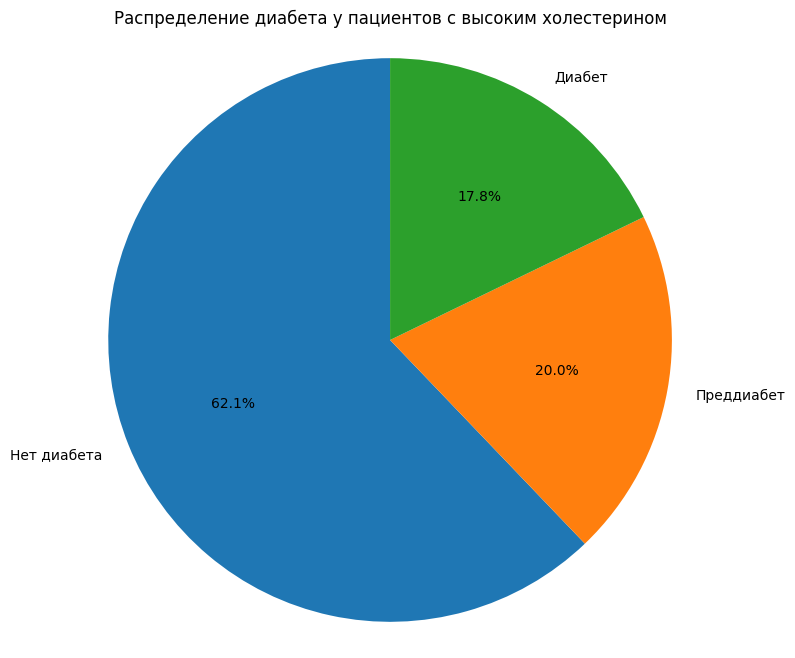

In [1627]:
chol_table = second_concat_copy[second_concat_copy['highchol'] == 1]
diabet_table_1 = chol_table.groupby('diabetes_binary')['highchol'].count().reset_index()
plt.figure(figsize=(8, 8))
labels = ['Нет диабета', 'Преддиабет', 'Диабет']
plt.pie(diabet_table_1['highchol'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Распределение диабета у пациентов с высоким холестерином')
plt.axis('equal')  
plt.show()

Из данного графика, видно, что холестерин так же может являтьс фактором риска развития диабета.

# Итоги

В ходе анализа данных из различных датасетов была выявлена четкая взаимосвязь между диабетом и такими факторами, как возраст и индекс массы тела (BMI). Эти параметры играют значительную роль в предрасположенности к развитию диабета. 

Кроме того, результаты исследования показали, что достаточная физическая активность, а также регулярное потребление фруктов и овощей в рационе пациента, способствуют снижению риска развития этого заболевания. Это подчеркивает важность здорового образа жизни в профилактике диабета.

С другой стороны, наследственность и социально-экономические факторы оказали незначительное влияние на развитие диабета, что может свидетельствовать о том, что образ жизни и привычки играют более важную роль в этом контексте. 

Интересно отметить, что анализ не выявил связи между диабетом и статусом курения, что может указывать на необходимость дальнейших исследований в этой области.

Таким образом, можно сделать вывод, что развитие диабета в значительной степени зависит от образа жизни, и акцент на физическую активность и сбалансированное питание может существенно снизить риск возникновения этого заболевания.